<a href="https://colab.research.google.com/github/ArminD93/KeplerExoplanetSearchResults/blob/dev/KeplerExoplanetSearchResults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kepler Exoplanet Search Results**
---

# **Spis treści:**

# 1. [**Opis wartości z kolumn**](#0)
# 2. [**Import bibliotek**](#1)
# 3. [**Przygotowanie danych:**](#2)
  ## 3.1. [Prezentacja danych](#3)
  ## 3.2. [Usunięcie niepotrzebnych kolumn](#4)  
  ## 3.3. [Zmiana typu object na typ category](#5)
  ## 3.4. [Brakujące wartości](#6)
# 4. [**Wyznaczenie wartości statystycznych**](#7)
# 5. [**Analiza danych**](#8)
  ## 5.1. [Analiza rozkładu wartości](#9)
  ## 5.2. [Pogrupowanie danych](#10)
  ## 5.3. [Analiza korelacji](#11)
# 6. [**Uczenie maszynowe:**](#12)
  ## 6.1. [Przygotowanie danych do uczenia maszynowego:](#13)
   ### 6.1.1. [Liczba występowań dla każdej z etykiet](#14)  
   ### 6.1.2. [Zakodowanie wartości etykiet](#15)
   ### 6.1.3. [Podział danych na zbiory uczące i testowe](#16)   
   ### 6.1.4. [Skalowanie cech](#17)
  ## 6.2. [Testowanie modeli:](#18)  
   ### 6.2.1. [Model regresji logistycznej](#19)  
   ### 6.2.2. [Model k-najbliższych sąsiadów](#20)
   ### 6.2.3. [Model drzewa decyzyjnego](#21)     
   ### 6.2.4. [Model lasów losowych](#22)  
   ### 6.2.5. [Model maszyny wektorów nośnych](#23)     
   ### 6.2.6. [Naiwny klasyfikator bayesowski](#24) 
  ## 6.3. [Porównanie otrzymanych wyników](#25)  
  ## 6.4. [Przeprowadzenie walidacji krzyżowej](#26)
  ## 6.5. [Podgląd na macierze błędów dla poszczególnych modeli](#27)
  ## 6.6. [Testowanie sieci neuronowej](#28)  
  ## 6.7. [Zastosowanie redukcji wymiarowości - algorytm PCA](#29)  
   ## 6.8. [Alogrytm KMeans](#30)  
   ## 6.9. [Wizualizacja skumulowanej wartości wariancji w zależności od liczby komponentów](#31)    


  
    
 









# <a name='0'></a>**1. Opis wartości z kolumn**


### Oznaczenia:

KOI - Kepler Objects of Interest

| Oznaczenie         | Opis             | 
| :----------------- | -----------------: |
|kepid|Identyfikacja Keplera|
|kepoi_name |**Nazwa KOI**. Liczba używana do identyfikacji i śledzenia obiektu zainteresowania Keplera (KOI). KOI to cel zidentyfikowany przez Kepler Project, który wyświetla co najmniej jedną sekwencję podobną do tranzytu w obrębie fotometrii szeregów czasowych Keplera, która wydaje się być astrofizyczna i początkowo zgodna z hipotezą przejścia planetarnego.|
|kepler_name |**Nazwa Keplera**. Nazwa numeru Keplera w formie „Kepler-N” plus mała litera identyfikująca planetę. Zasadniczo liczby te są łatwiejsze do zapamiętania niż odpowiadające im oznaczenia KOI lub KIC / KepID i mają na celu wyraźne wskazanie klasy obiektów, które zostały potwierdzone lub zatwierdzone jako planety - krok wyżej od oznaczenia kandydata na planetę.|
| **koi_disposition**|Czy obiekt został zidentyfikowany? Kategoria rozpoznania obiektu|
|koi_pdisposition|Rozpoznanie z wykorzystaniem danych Keplera|
| koi_score|Wartość od 0 do 1 określa pewność identyfikacji - Im bliżej 1 tym jest wysokie prawdopodobieństwo|  
| koi_fpflag_nt|**Flaga inna niż tranzytowa**  Obejmuje to między innymi artefakty instrumentalne, nie zmienne gwiazdy zmienne i fałszywe detekcje (bardzo niski SNR).| 
| koi_fpflag_ss      |**Flaga Gwiezdnego Zaćmienia** zdarzenie podobne do przejścia jest najprawdopodobniej spowodowane przez binarne zaćmienie.|
| koi_fpflag_co      |**Flaga przesunięcia środka ciężkości** Źródło sygnału pochodzi z pobliskiej gwiazdy,|
| koi_fpflag_ec      |**Dopasowanie efemeryd wskazuje flagę zanieczyszczenia** KOI ma ten sam okres i epokę co inny obiekt i jest oceniany jako wynik zanieczyszczenia topnikiem w otworze lub przesłuchu  elektronicznego.|
| koi_period         |**Okres obiegu (dni)** Odstęp między kolejnymi tranzytami planetarnymi. ( kolumny niepewności err1 i err2 )       |
| koi_time0bk        |**Epoka tranzytowa (BJD - 2 454 833,0))** Czas odpowiadający środkowi pierwszego wykrytego tranzytu w barycentrycznym dniu juliańskim (BJD) minus stałe przesunięcie 2 454 833,0 dni. Przesunięcie odpowiada godzinie 12:00 1 stycznia 2009 r. UTC. ( kolumny niepewności err1 i err2 )| 
| koi_impact         |Przewidywana przez niebo odległość między środkiem tarczy gwiezdnej a środkiem tarczy planety w połączeniu, znormalizowana przez promień gwiezdny.|
| koi_duration       |**Czas tranzytu (godziny)** Czas trwania zaobserwowanych tranzytów. Czas trwania mierzy się od pierwszego kontaktu planety z gwiazdą do ostatniego kontaktu. Czasy kontaktu są zwykle obliczane na podstawie najlepiej dopasowanego modelu wyprodukowanego przez model Mandela-Agola (2002) dopasowanego do wielowartościowej krzywej światła Keplera, przy założeniu efemerydy liniowej orbity.|
| koi_depth          |**Głębokość tranzytu (części na milion)** Część strumienia gwiezdnego utracona przy minimalnym transporcie planetarnym.|
| koi_prad           |**Promień planety** Promień planetarny jest iloczynem stosunku promienia gwiazdy planety i promienia gwiazdy.|
| koi_teq            |**Temperatura równowagi(Kelvin)** Przybliżenie temperatury planety.|
| koi_insol          |**Strumień nasłonecznienia**.Strumień nasłonecznienia jest innym sposobem na uzyskanie temperatury równowagi. Zależy to od parametrów gwiezdnych (w szczególności promienia i temperatury gwiezdnej) oraz od półosi głównej osi planety. Jest podawany w jednostkach względem jednostek zmierzonych dla Ziemi od Słońca.| 
| koi_model_snr        |**Tranzyt sygnału do szumu** Głębokość tranzytu znormalizowana przez średnią niepewność strumienia podczas tranzytu.|
| koi_tce_plnt_num     |Numer planety TCE stowarzyszony z KOI.|
|koi_tce_delivname|Nazwa dostawy TCE odpowiadająca danym TCE stowarzyszonym z KOI.|
| koi_steff            |**Temperatura fotosfery gwiazdy** Fotosfera – widzialna, powierzchniowa warstwa gwiazdy, emitująca na zewnątrz gwiazdy fale elektromagnetyczne w postaci światła widzialnego.|    
| koi_slogg    |**Grawitacja powierzchni gwiazd (log10 (cm s-2)** Podstawowy logarytm 10 przyspieszenia wywołanego grawitacją na powierzchni gwiazdy.|    
| koi_srad    | **Promieś gwiezdny** Fotosferyczny promień gwiazdy.|               
| ra   |**RA (deg). Rektascensja**, α (łac. recta ascensio – "wznoszenie proste") – jedna ze współrzędnych astronomicznych, określających położenie ciała niebieskiego na sferze niebieskiej w układzie współrzędnych astronomicznych zwanym układem równikowym równonocnym.|                
| dec  |**Dec (deg). Deklinacja** (łac. declinatio – „odchylenie”, oznaczana symbolem δ) – jedna ze współrzędnych określających położenie ciała w obydwu układach równikowych: równonocnym i godzinnym. Definiujemy ją jako kąt pomiędzy kierunkiem poprowadzonym od obserwatora do obiektu a płaszczyzną równika niebieskiego.|                  
| koi_kepmag|Kepler-band (mag)|               

# <a name='1'></a>**2. Import bibliotek**

In [1]:
try:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import plotly.figure_factory as ff
  import plotly.express as px
  from plotly.subplots import make_subplots
  import seaborn as sns
  sns.set(style="ticks", color_codes=True)
  import time

  from sklearn.model_selection import train_test_split
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import GridSearchCV

  # models
  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.svm import SVC
  from sklearn.naive_bayes import GaussianNB

  # other models
  from xgboost import XGBClassifier
  from catboost import CatBoostClassifier
  from lightgbm import LGBMClassifier

  # preprocessing
  # zmienne ciągłe
  from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
  # zmienne kategoryczne
  from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

  # Pipeline
  from sklearn.pipeline import Pipeline
  from sklearn.compose import ColumnTransformer


  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import classification_report

  from mlxtend.plotting import plot_confusion_matrix

except:
  !pip install catboost
  from catboost import CatBoostClassifier

In [ ]:
# !pip install neptune-client

In [ ]:
 import neptune

 from time import sleep 

In [ ]:
neptune.init(project_qualified_name='armin.derencz/KeplerExoplanetSearchResultsTest',
             api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiODRiMmM0NjMtYmYwYS00NTBkLWEyZTEtOGJjMTgwYTVlY2E1In0='
             )

Project(armin.derencz/KeplerExoplanetSearchResultsTest)

# <a name='2'></a>**3. Przygotowanie danych**


## <a name='3'></a>3.1. Prezentacja danych

In [2]:
kepler_raw = pd.read_csv('/content/drive/My Drive/ColabNotebooks/KeplerExoplanetSearchResults/datasets/cumulative.csv', low_memory=False)

# Kopia danych
kepler = kepler_raw.copy()                         
                            
kepler.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
kepler.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

## <a name='4'></a>3.2 Usunięcie niepotrzebnych kolumn


In [4]:
for i, column in enumerate(kepler.columns):

  if column.endswith('_err1') or column.endswith('_err2'): 
      kepler.drop([column], 1, inplace=True)

for i, name in enumerate(['kepid', 'rowid', 'kepoi_name', 'kepler_name', 'koi_pdisposition','koi_tce_plnt_num', 'koi_tce_delivname', 'koi_score']):
  kepler.drop([name], 1, inplace=True)

kepler.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   koi_disposition  9564 non-null   object 
 1   koi_fpflag_nt    9564 non-null   int64  
 2   koi_fpflag_ss    9564 non-null   int64  
 3   koi_fpflag_co    9564 non-null   int64  
 4   koi_fpflag_ec    9564 non-null   int64  
 5   koi_period       9564 non-null   float64
 6   koi_time0bk      9564 non-null   float64
 7   koi_impact       9201 non-null   float64
 8   koi_duration     9564 non-null   float64
 9   koi_depth        9201 non-null   float64
 10  koi_prad         9201 non-null   float64
 11  koi_teq          9201 non-null   float64
 12  koi_insol        9243 non-null   float64
 13  koi_model_snr    9201 non-null   float64
 14  koi_steff        9201 non-null   float64
 15  koi_slogg        9201 non-null   float64
 16  koi_srad         9201 non-null   float64
 17  ra            

## <a name='5'></a>3.3 Zmiana typu object na typ category


In [5]:
kepler['koi_disposition'] = kepler['koi_disposition'].astype('category')
kepler.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   koi_disposition  9564 non-null   category
 1   koi_fpflag_nt    9564 non-null   int64   
 2   koi_fpflag_ss    9564 non-null   int64   
 3   koi_fpflag_co    9564 non-null   int64   
 4   koi_fpflag_ec    9564 non-null   int64   
 5   koi_period       9564 non-null   float64 
 6   koi_time0bk      9564 non-null   float64 
 7   koi_impact       9201 non-null   float64 
 8   koi_duration     9564 non-null   float64 
 9   koi_depth        9201 non-null   float64 
 10  koi_prad         9201 non-null   float64 
 11  koi_teq          9201 non-null   float64 
 12  koi_insol        9243 non-null   float64 
 13  koi_model_snr    9201 non-null   float64 
 14  koi_steff        9201 non-null   float64 
 15  koi_slogg        9201 non-null   float64 
 16  koi_srad         9201 non-null   float64 


## <a name='6'></a>3.4 Brakujące wartości

In [6]:
# Sprawdzenie braków
kepler.isnull().sum()

koi_disposition      0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_time0bk          0
koi_impact         363
koi_duration         0
koi_depth          363
koi_prad           363
koi_teq            363
koi_insol          321
koi_model_snr      363
koi_steff          363
koi_slogg          363
koi_srad           363
ra                   0
dec                  0
koi_kepmag           1
dtype: int64

In [7]:
kepler[pd.isnull(kepler['koi_impact'])].head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
329,FALSE POSITIVE,0,0,0,0,0.734525,133.431080,NaN,6.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293.28799,41.560455,13.220
357,FALSE POSITIVE,0,0,0,0,6.721078,134.777598,NaN,7.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291.60690,38.348061,14.792
476,CANDIDATE,0,0,0,0,1.008617,132.109479,NaN,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292.47971,38.514919,15.319
490,FALSE POSITIVE,1,0,1,1,200.611033,456.844440,NaN,7.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.51962,44.453941,15.783
492,FALSE POSITIVE,1,0,1,1,1.634846,134.512115,NaN,6.11,NaN,NaN,NaN,17098.4,NaN,NaN,NaN,NaN,298.21188,44.324638,12.647


In [8]:
kepler = kepler.dropna()
kepler.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9200 entries, 0 to 9563
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   koi_disposition  9200 non-null   category
 1   koi_fpflag_nt    9200 non-null   int64   
 2   koi_fpflag_ss    9200 non-null   int64   
 3   koi_fpflag_co    9200 non-null   int64   
 4   koi_fpflag_ec    9200 non-null   int64   
 5   koi_period       9200 non-null   float64 
 6   koi_time0bk      9200 non-null   float64 
 7   koi_impact       9200 non-null   float64 
 8   koi_duration     9200 non-null   float64 
 9   koi_depth        9200 non-null   float64 
 10  koi_prad         9200 non-null   float64 
 11  koi_teq          9200 non-null   float64 
 12  koi_insol        9200 non-null   float64 
 13  koi_model_snr    9200 non-null   float64 
 14  koi_steff        9200 non-null   float64 
 15  koi_slogg        9200 non-null   float64 
 16  koi_srad         9200 non-null   float64 


# <a name='7'></a>**5. Analiza danych**

### Oznaczenia:

KOI - Kepler Objects of Interest

| Oznaczenie         | Opis             | 
| :----------------- | -----------------: |
| koi_period         |**Okres obiegu (dni)** Odstęp między kolejnymi tranzytami planetarnymi. ( kolumny niepewności err1 i err2 )       |
| koi_time0bk        |**Epoka tranzytowa (BJD - 2 454 833,0))** Czas odpowiadający środkowi pierwszego wykrytego tranzytu w barycentrycznym dniu juliańskim (BJD) minus stałe przesunięcie 2 454 833,0 dni. Przesunięcie odpowiada godzinie 12:00 1 stycznia 2009 r. UTC. ( kolumny niepewności err1 i err2 )| 
| koi_impact         |Przewidywana przez niebo odległość między środkiem tarczy gwiezdnej a środkiem tarczy planety w połączeniu, znormalizowana przez promień gwiezdny.|
| koi_duration       |**Czas tranzytu (godziny)** Czas trwania zaobserwowanych tranzytów. Czas trwania mierzy się od pierwszego kontaktu planety z gwiazdą do ostatniego kontaktu. Czasy kontaktu są zwykle obliczane na podstawie najlepiej dopasowanego modelu wyprodukowanego przez model Mandela-Agola (2002) dopasowanego do wielowartościowej krzywej światła Keplera, przy założeniu efemerydy liniowej orbity.|
| koi_depth          |**Głębokość tranzytu (części na milion)** Część strumienia gwiezdnego utracona przy minimalnym transporcie planetarnym.|
| koi_prad           |**Promień planety** Promień planetarny jest iloczynem stosunku promienia gwiazdy planety i promienia gwiazdy.|
| koi_teq            |**Temperatura równowagi(Kelvin)** Przybliżenie temperatury planety.|
| koi_insol          |**Strumień nasłonecznienia**.Strumień nasłonecznienia jest innym sposobem na uzyskanie temperatury równowagi. Zależy to od parametrów gwiezdnych (w szczególności promienia i temperatury gwiezdnej) oraz od półosi głównej osi planety. Jest podawany w jednostkach względem jednostek zmierzonych dla Ziemi od Słońca.| 
| koi_model_snr        |**Tranzyt sygnału do szumu** Głębokość tranzytu znormalizowana przez średnią niepewność strumienia podczas tranzytu.|
| koi_tce_plnt_num     |Numer planety TCE stowarzyszony z KOI.|
|koi_tce_delivname|Nazwa dostawy TCE odpowiadająca danym TCE stowarzyszonym z KOI.|
| koi_steff            |**Temperatura fotosfery gwiazdy** Fotosfera – widzialna, powierzchniowa warstwa gwiazdy, emitująca na zewnątrz gwiazdy fale elektromagnetyczne w postaci światła widzialnego.|    
| koi_slogg    |**Grawitacja powierzchni gwiazd (log10 (cm s-2)** Podstawowy logarytm 10 przyspieszenia wywołanego grawitacją na powierzchni gwiazdy.|    
| koi_srad    | **Promieś gwiezdny** Fotosferyczny promień gwiazdy.|               
| ra   |**RA (deg). Rektascensja**, α (łac. recta ascensio – "wznoszenie proste") – jedna ze współrzędnych astronomicznych, określających położenie ciała niebieskiego na sferze niebieskiej w układzie współrzędnych astronomicznych zwanym układem równikowym równonocnym.|                
| dec  |**Dec (deg). Deklinacja** (łac. declinatio – „odchylenie”, oznaczana symbolem δ) – jedna ze współrzędnych określających położenie ciała w obydwu układach równikowych: równonocnym i godzinnym. Definiujemy ją jako kąt pomiędzy kierunkiem poprowadzonym od obserwatora do obiektu a płaszczyzną równika niebieskiego.|                  
| koi_kepmag|Kepler-band (mag)|               

In [9]:
kepler['koi_disposition'].value_counts()

FALSE POSITIVE    4723
CONFIRMED         2292
CANDIDATE         2185
Name: koi_disposition, dtype: int64

In [10]:
kepler_CONFIRMED = kepler.where(kepler['koi_disposition'] == 'CONFIRMED').dropna()
kepler_CANDIDATE = kepler.where(kepler['koi_disposition'] == 'CANDIDATE').dropna()
kepler_FALSE_POSITIVE = kepler.where(kepler['koi_disposition'] == 'FALSE POSITIVE').dropna()


kepler_CONFIRMED.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0.0,0.0,0.0,0.0,9.488036,170.53875,0.146,2.9575,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,0.0,0.0,0.0,0.0,54.418383,162.51384,0.586,4.5070,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
4,CONFIRMED,0.0,0.0,0.0,0.0,2.525592,171.59555,0.701,1.6545,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509
5,CONFIRMED,0.0,0.0,0.0,0.0,11.094321,171.20116,0.538,4.5945,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,296.28613,48.224670,15.714
6,CONFIRMED,0.0,0.0,0.0,0.0,4.134435,172.97937,0.762,3.1402,686.0,2.77,1160.0,427.65,40.2,6046.0,4.486,0.972,296.28613,48.224670,15.714


## <a name='8'></a>5.1 Wyznaczenie wartości statystycznych

## <a name='9'></a>5.2 Pogrupowanie danych

In [11]:
kepler_groupby_disposition = kepler.groupby(by='koi_disposition')

In [12]:
kepler_groupby_disposition.groups

{'CANDIDATE': [37, 58, 62, 63, 72, 84, 92, 94, 103, 112, 122, 153, 165, 171, 183, 195, 201, 210, 215, 229, 230, 246, 252, 268, 286, 303, 311, 315, 317, 318, 319, 326, 341, 344, 347, 353, 360, 366, 378, 390, 402, 404, 415, 428, 432, 442, 452, 453, 455, 461, 466, 483, 486, 497, 507, 511, 535, 539, 540, 541, 550, 551, 561, 563, 572, 574, 580, 596, 602, 612, 613, 618, 619, 629, 630, 632, 645, 647, 661, 663, 665, 668, 670, 671, 689, 691, 711, 719, 735, 739, 740, 744, 751, 758, 765, 779, 802, 806, 815, 820, ...], 'CONFIRMED': [0, 1, 4, 5, 6, 7, 9, 10, 11, 12, 13, 18, 19, 21, 22, 23, 25, 26, 27, 31, 32, 33, 34, 35, 36, 39, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 59, 61, 64, 65, 66, 67, 68, 69, 70, 73, 74, 76, 77, 78, 81, 82, 85, 86, 87, 88, 89, 90, 91, 96, 97, 98, 99, 102, 104, 105, 107, 108, 109, 110, 111, 113, 114, 115, 119, 120, 123, 124, 125, 126, 129, 130, 131, 132, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 148, ...], 'FALSE POSITIVE': [2, 3, 8, 14, 15, 16, 17

In [13]:
[col for col in kepler.columns[5:]]

['koi_period',
 'koi_time0bk',
 'koi_impact',
 'koi_duration',
 'koi_depth',
 'koi_prad',
 'koi_teq',
 'koi_insol',
 'koi_model_snr',
 'koi_steff',
 'koi_slogg',
 'koi_srad',
 'ra',
 'dec',
 'koi_kepmag']

In [14]:
kepler_groupby_disposition_mean_std = kepler_groupby_disposition.agg(
                                                                      {
                                                                        'koi_period'    : ['mean', 'std'],
                                                                        'koi_time0bk'   : ['mean', 'std'],
                                                                        'koi_impact'    : ['mean', 'std'],
                                                                        'koi_duration'  : ['mean', 'std'],
                                                                        'koi_depth'     : ['mean', 'std'],
                                                                        'koi_prad'      : ['mean', 'std'],
                                                                        'koi_teq'       : ['mean', 'std'],
                                                                        'koi_insol'     : ['mean', 'std'],
                                                                        'koi_model_snr' : ['mean', 'std'],
                                                                        'koi_steff'     : ['mean', 'std'],
                                                                        'koi_slogg'     : ['mean', 'std'],
                                                                        'koi_srad'      : ['mean', 'std'],
                                                                        'ra'            : ['mean', 'std'],
                                                                        'dec'           : ['mean', 'std'],
                                                                        'koi_kepmag'    : ['mean', 'std']
                                                                      }
                                                                    ).apply(lambda x: round(x, 3))


kepler_groupby_disposition_mean_std.T

koi_disposition      CANDIDATE  CONFIRMED  FALSE POSITIVE
koi_period    mean     131.283     27.053          70.897
              std     2783.360     54.028         138.975
koi_time0bk   mean     170.316    157.246         167.210
              std       75.209     42.481          72.731
koi_impact    mean       0.537      0.427           0.976
              std        1.990      0.332           4.454
koi_duration  mean       4.814      4.307           6.698
              std        4.421      2.720           8.209
koi_depth     mean    1864.239   1141.446       44924.240
              std    12502.100   2686.208      110382.027
koi_prad      mean      15.931      2.872         191.672
              std      316.937      3.361        4288.541
koi_teq       mean     882.420    839.126        1298.734
              std      665.620    386.741        1028.230
koi_insol     mean    5359.428    350.666       12383.162
              std   155923.364   1223.676      195698.944
koi_model_snr mean      45.596     87.923         442.498
              std      231.866    284.086        1049.244
koi_steff     mean    5639.767   5477.974        5848.887
              std      693.971    677.133         862.706
koi_slogg     mean       4.331      4.411           4.251
              std        0.391      0.235           0.508
koi_srad      mean       1.566      1.067           2.125
              std        5.875      0.643           7.523
ra            mean     291.790    290.943         292.733
              std        4.835      4.757           4.612
dec           mean      43.928     44.366          43.484
              std        3.606      3.569           3.581
koi_kepmag    mean      14.348     14.339          14.212
              std        1.303      1.224           1.477

## <a name='10'></a>5.3 Analiza rozkładu wartości

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

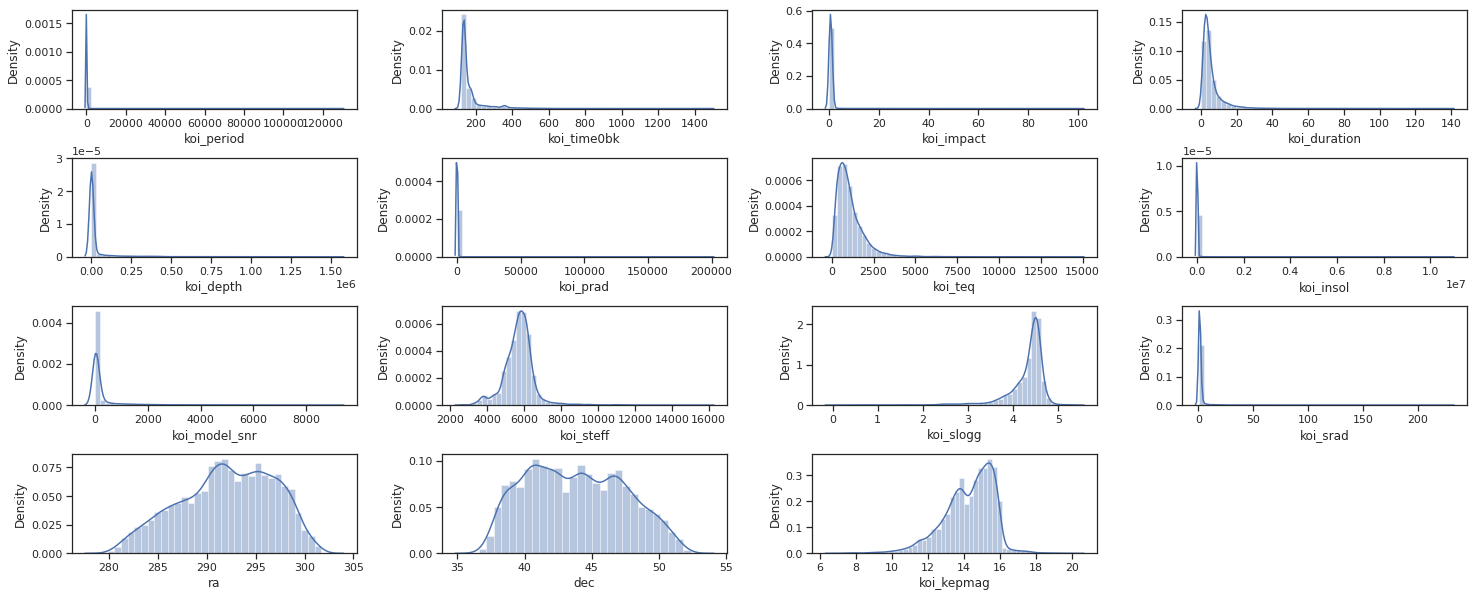

In [ ]:
cols = kepler.columns[5:]

fig = plt.figure(figsize=(25,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

col_idx = 0
for i in range(1, 16):
  fig.add_subplot(4, 4, i) 
  sns.distplot(kepler[cols[col_idx]])
  col_idx += 1

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

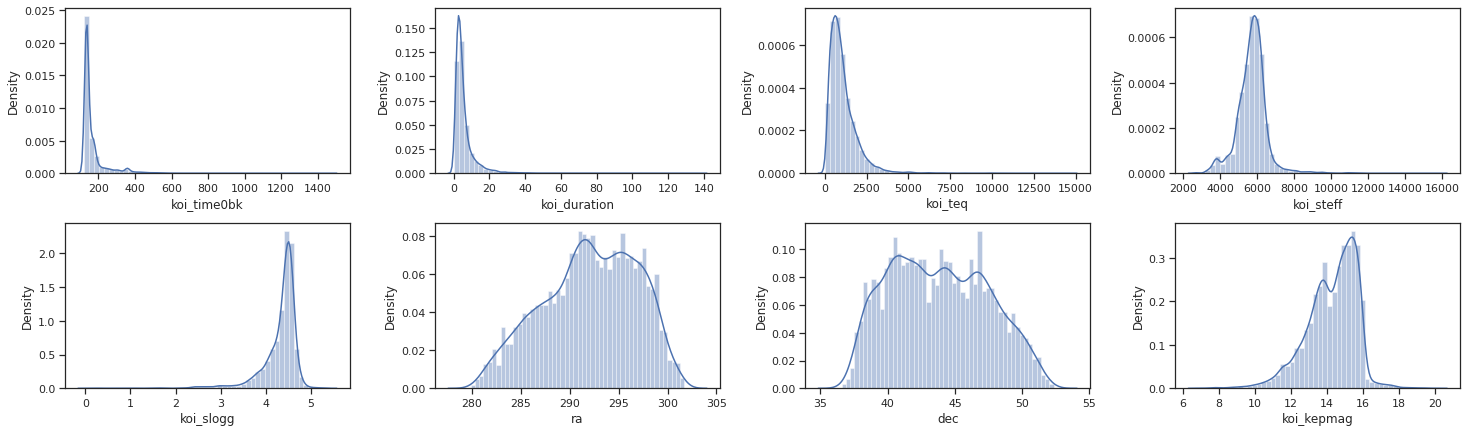

In [ ]:
cols = [ 'koi_time0bk', 'koi_duration', 'koi_teq',
        'koi_steff', 	'koi_slogg', 'ra', 	'dec', 	'koi_kepmag']

fig = plt.figure(figsize=(25,7))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

col_idx = 0
for i in range(1, 9):
  fig.add_subplot(2, 4, i) 
  sns.distplot(kepler[cols[col_idx]], bins=50, )
  col_idx += 1

plt.show()

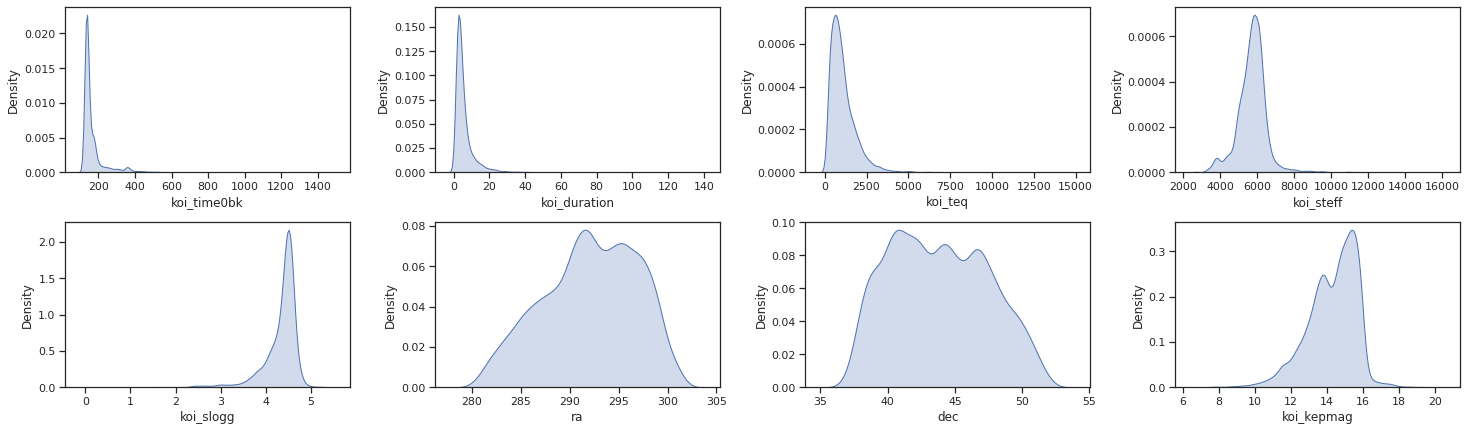

In [ ]:
fig = plt.figure(figsize=(25,7))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

col_idx = 0
for i in range(1, 9):
  fig.add_subplot(2, 4, i) 
  sns.kdeplot(kepler[cols[col_idx]], shade=True)
  col_idx += 1

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

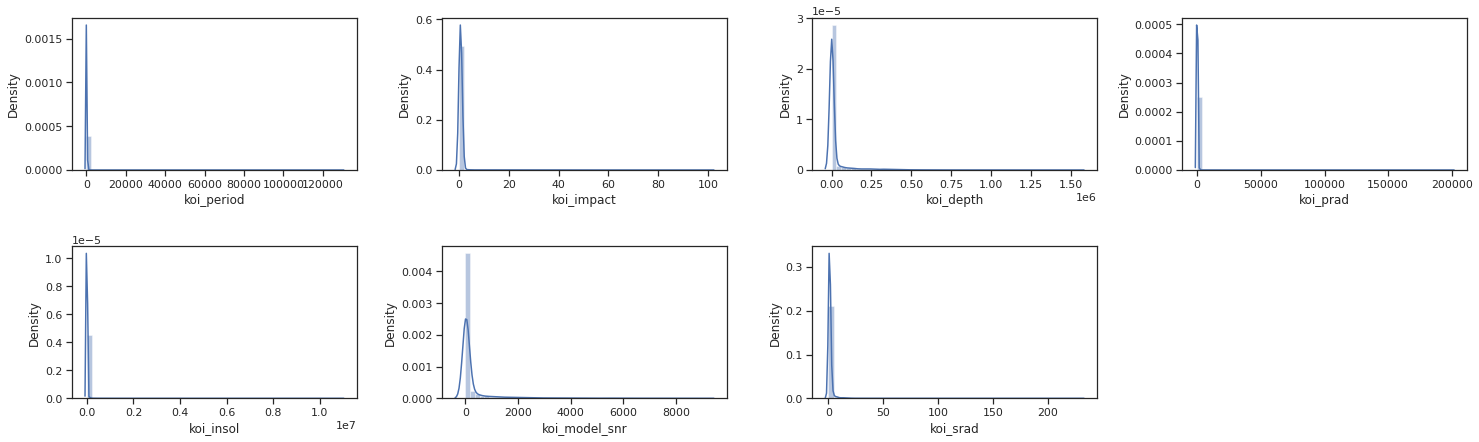

In [ ]:
cols = [ 'koi_period', 'koi_impact', 'koi_depth', 'koi_prad', 
        'koi_insol', 	'koi_model_snr', 	'koi_srad' ]

fig = plt.figure(figsize=(25,7))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

col_idx = 0
for i in range(1, 8):
  fig.add_subplot(2, 4, i) 
  sns.distplot(kepler[cols[col_idx]], bins=50)
  col_idx += 1


plt.show()

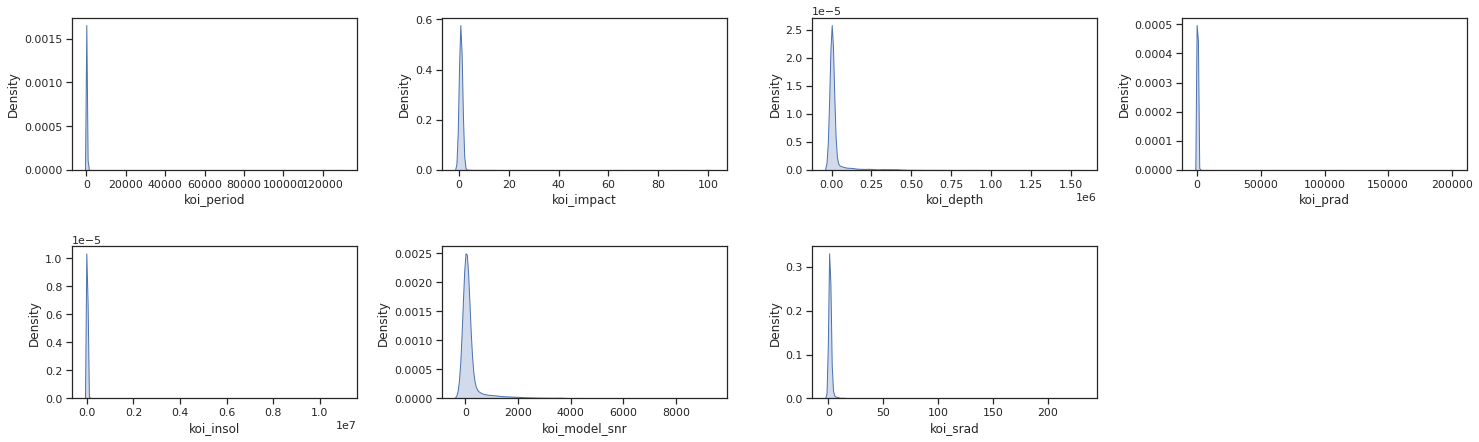

In [ ]:
fig = plt.figure(figsize=(25,7))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

col_idx = 0
for i in range(1, 8):
  fig.add_subplot(2, 4, i) 
  sns.kdeplot(kepler[cols[col_idx]],  shade=True)
  col_idx += 1


plt.show()

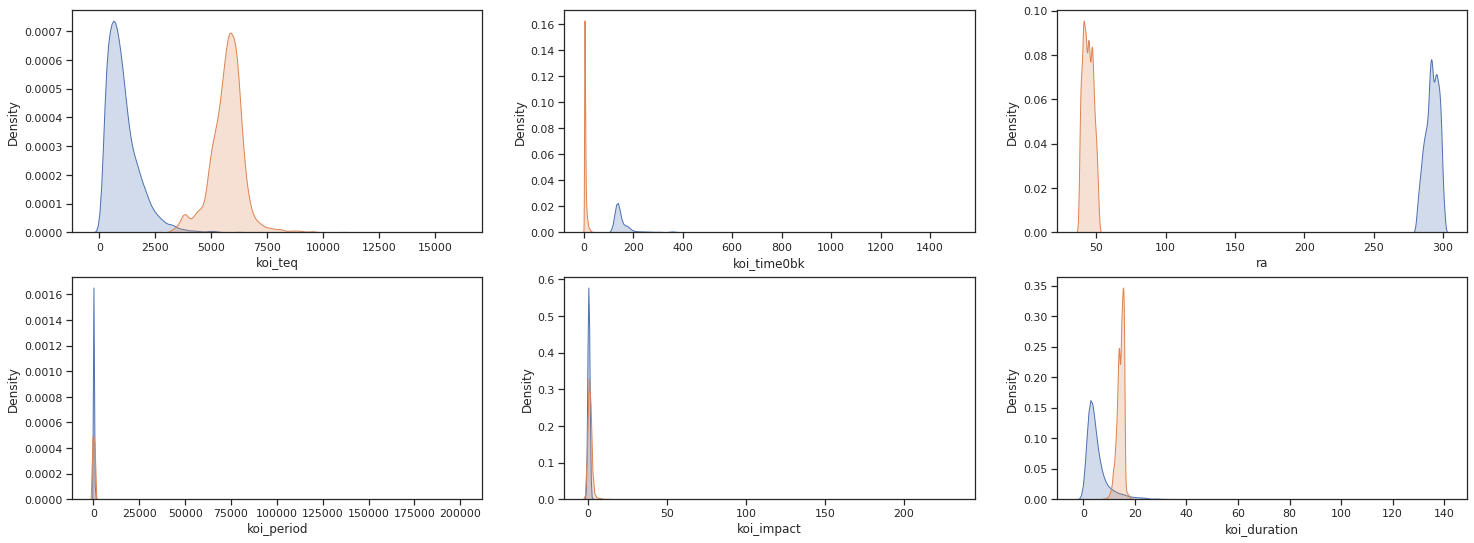

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(25,9))

g1 = sns.kdeplot(kepler['koi_teq'], shade=True, ax=ax[0,0])
g2 = sns.kdeplot(kepler['koi_steff'], shade=True, ax=ax[0,0])

g3 = sns.kdeplot(kepler['koi_time0bk'], shade=True, ax=ax[0,1])
g4 = sns.kdeplot(kepler['koi_duration'], shade=True, ax=ax[0,1])

g5 = sns.kdeplot(kepler['ra'], shade=True, ax=ax[0,2])
g6 = sns.kdeplot(kepler['dec'], shade=True, ax=ax[0,2])


g1 = sns.kdeplot(kepler['koi_period'], shade=True, ax=ax[1,0])
g2 = sns.kdeplot(kepler['koi_prad'], shade=True, ax=ax[1,0])

g3 = sns.kdeplot(kepler['koi_impact'], shade=True, ax=ax[1,1])
g4 = sns.kdeplot(kepler['koi_srad'], shade=True, ax=ax[1,1])

g5 = sns.kdeplot(kepler['koi_duration'], shade=True, ax=ax[1,2])
g6 = sns.kdeplot(kepler['koi_kepmag'], shade=True, ax=ax[1,2])

plt.show()

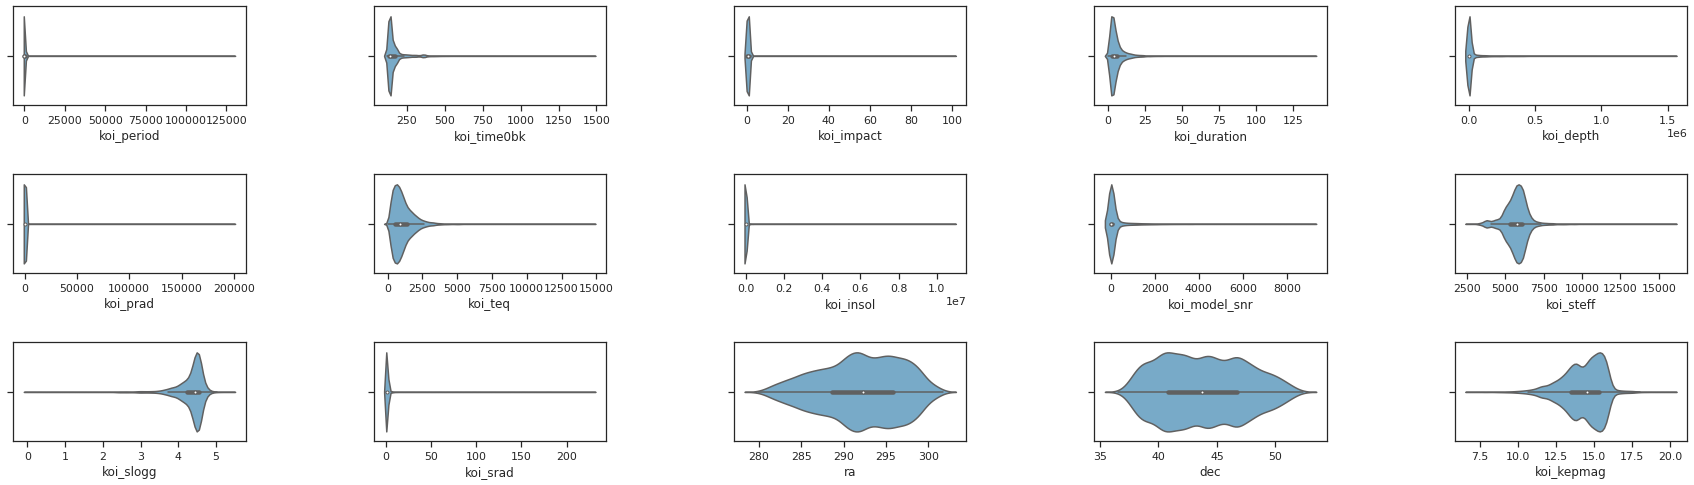

In [ ]:
cols = kepler.columns[5:]

col_idx = 0

fig = plt.figure(figsize=(30, 8))
fig.subplots_adjust(hspace=0.7, wspace=0.55)

for i in range(1, 16):
  fig.add_subplot(3, 5, i) 
  sns.violinplot( x=cols[col_idx], data=kepler, palette='Blues')
  col_idx += 1


plt.show()

## <a name='11'></a>5.4 Analiza korelacji

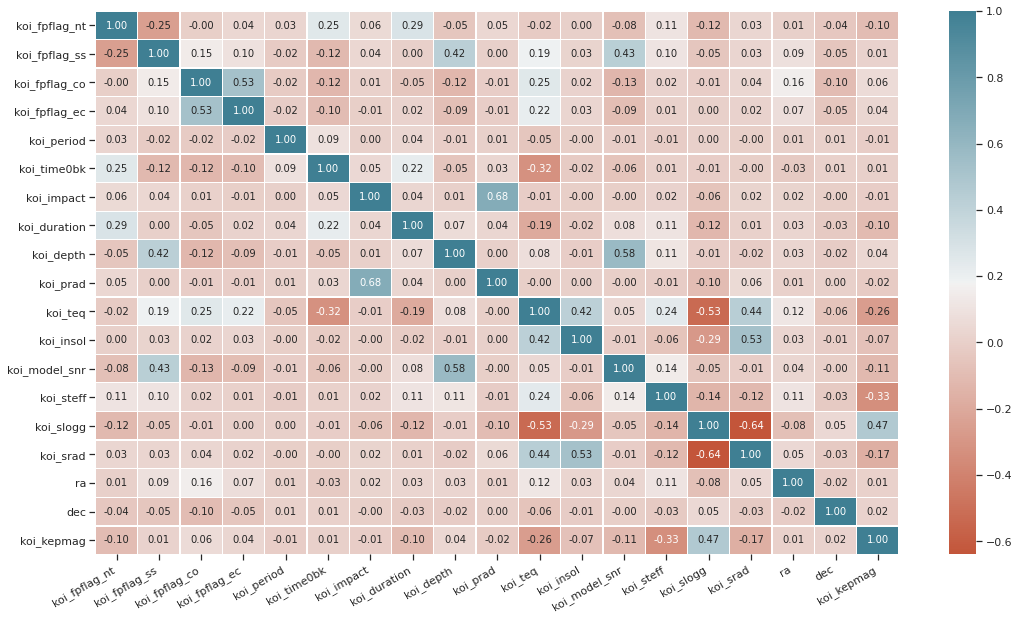

In [ ]:
corr = kepler.corr()

fig = plt.figure(figsize=(18,10))
g = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt='.2f', linewidth=.3, cmap=sns.diverging_palette(20, 220, n=256))
g.set_xticklabels( g.get_xticklabels(), rotation=30,  horizontalalignment='right', fontweight='light' )

plt.show()

In [ ]:
cols = [ 'koi_prad', 'koi_impact', 'koi_model_snr', 'koi_depth', 'koi_srad', 'koi_insol']
sns.pairplot(kepler[cols], height=1.5, aspect=2)
plt.show()

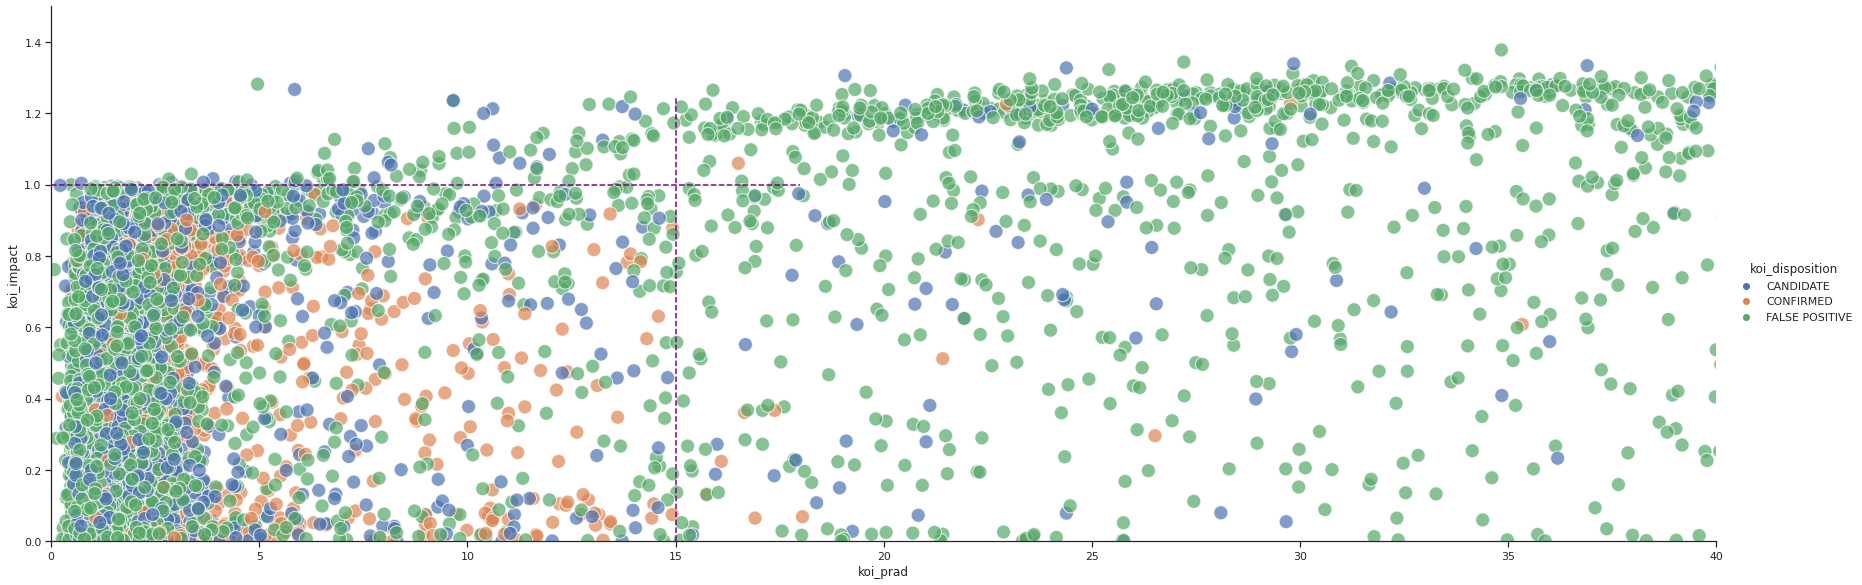

In [ ]:
g = sns.relplot(x='koi_prad', y='koi_impact', data=kepler, height=8 , aspect=3, hue='koi_disposition', s=200, alpha=0.7)
plt.xlim(0, 40)
plt.ylim(0, 1.5)
plt.vlines(x=15, ymin=0, ymax=1.25, colors='purple', linestyles='--', lw=1.5)
plt.hlines(y=1, xmin=0, xmax=18, colors='purple', linestyles='--', lw=1.5)

plt.show()

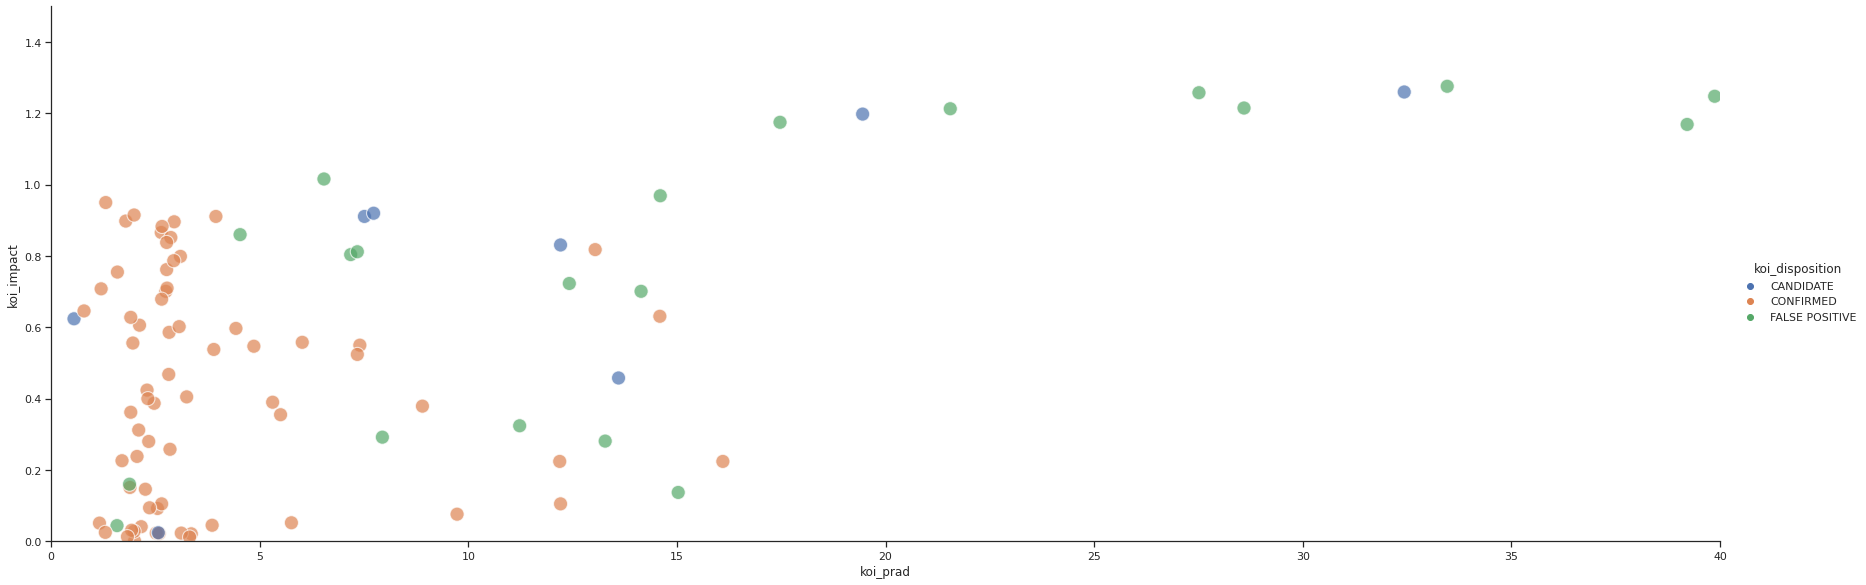

In [ ]:
g = sns.relplot(x='koi_prad', y='koi_impact', data=kepler[:100], height=8 , aspect=3, hue='koi_disposition', s=200, alpha=0.7)
plt.xlim(0, 40)
plt.ylim(0, 1.5)
# plt.vlines(x=15, ymin=0, ymax=1.25, colors='purple', linestyles='--', lw=1.5)
# plt.hlines(y=1, xmin=0, xmax=18, colors='purple', linestyles='--', lw=1.5)

plt.show()

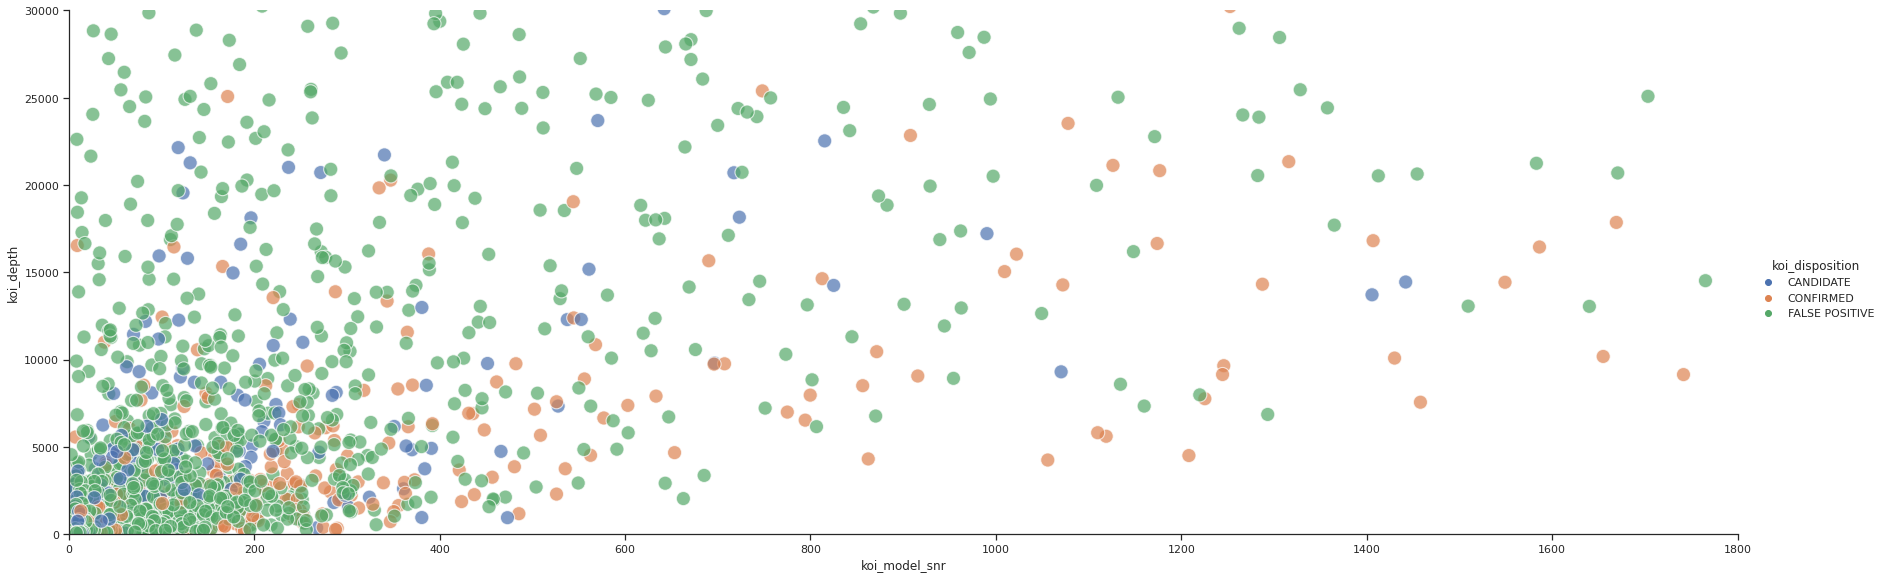

In [ ]:
g2 = sns.relplot(x='koi_model_snr', y='koi_depth', data=kepler, height=8 , aspect=3, hue='koi_disposition', s=200, alpha=0.7)
plt.xlim(0, 1800)
g2 = plt.ylim(0, 3*10**4)
plt.show()

# <a name='12'></a>**6. Uczenie maszynowe**

## <a name='13'></a>6.1 Przygotowanie danych do uczenia maszynowego

In [15]:
kepler.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509


### <a name='14'></a>6.1.1 Liczba występowań dla każdej z etykiet

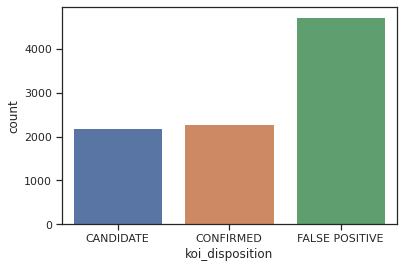

In [16]:
sns.countplot(x='koi_disposition', data=kepler)

plt.show()

### <a name='15'></a>6.1.2 Zakodowanie wartości etykiet

In [ ]:
# encoder = LabelEncoder()

# y = kepler['koi_disposition']

# kepler['koi_disposition'] = encoder.fit_transform(y)

# kepler.head()

### <a name='16'></a>6.1.3 Podział danych na zbiory uczące i testowe

In [17]:
X = kepler.drop("koi_disposition", axis=1) 
y = kepler['koi_disposition']              

print(f'X: {X.shape} ')
print(f'y: {y.shape} ')

X: (9200, 19) 
y: (9200,) 


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

print(f'X_train shape:  {X_train.shape}')
print(f'X_test shape:   {X_test.shape}')

print(f'y_train shape:  {y_train.shape}')
print(f'y_test shape:   {y_test.shape}')

X_train shape:  (7360, 19)
X_test shape:   (1840, 19)
y_train shape:  (7360,)
y_test shape:   (1840,)


In [19]:
X.dtypes

koi_fpflag_nt      int64
koi_fpflag_ss      int64
koi_fpflag_co      int64
koi_fpflag_ec      int64
koi_period       float64
koi_time0bk      float64
koi_impact       float64
koi_duration     float64
koi_depth        float64
koi_prad         float64
koi_teq          float64
koi_insol        float64
koi_model_snr    float64
koi_steff        float64
koi_slogg        float64
koi_srad         float64
ra               float64
dec              float64
koi_kepmag       float64
dtype: object

In [58]:
# lista kolumn numerycznych
cols_numerical = X_train.select_dtypes(include=['int64', 'float64']).columns

In [75]:
# pipeline testing
# ################

# transformer dla kolumn numerycznych
transformer_numerical = Pipeline(
                                  steps = [
                                            ('num_transformer', None )
                                          ] 
                                 )
# preprocesor danych
preprocessor = ColumnTransformer(
                                  transformers = [
                                                  ('numerical', transformer_numerical, cols_numerical ),                    
                                              ]
                                 )

# klasyfikatory                            
classifiers = [
    LogisticRegression(), 
    KNeighborsClassifier(), # 3 bo mamy dwie klasy ??
    DecisionTreeClassifier(max_depth=4, random_state=42 ),
    RandomForestClassifier(n_estimators=15, random_state=42 ),
    SVC(),
    XGBClassifier(verbosity=0)
]
 
# transformatory dla kolumn liczbowych
scalers = [StandardScaler(), MinMaxScaler(), Normalizer()]
 
# # transformatory dla kolumn kategorycznych
# cat_transformers = [OrdinalEncoder(), OneHotEncoder()]                                

In [62]:
grid_param = [
              { 'classifier'                 : [ LogisticRegression()],
                'classifier__penalty'        : ['l2'],
                'classifier__C'              : np.logspace( 0, 5, 10 ),
                'classifier__solver'         : ['liblinear'],
               
               },
              { 'classifier'                 : [ KNeighborsClassifier()],
                'classifier__n_neighbors'    : [ 2, 3, 5 ],
               },  
              { 'classifier'                 : [ DecisionTreeClassifier()],
                'classifier__max_depth'      : [2, 4, 8 ],
               },  
              { 'classifier'                 : [ RandomForestClassifier()],
                'classifier__max_depth'      : [2, 4, 8 ],
               },    
              { 'classifier'                 : [ SVC()],
                'classifier__C'              : [0.001, 0.1, 10e2 ],               
              },       
              { 'classifier'                 : [ XGBClassifier()],
                'classifier__max_depth'      : [2, 3,    ]          
              }                           
]

In [63]:
models_df = pd.DataFrame()
 
# utworzenie pipeline:
pipe = Pipeline( steps = [ ('preprocessor', preprocessor), ('classifier', None) ] )

In [ ]:
# %%time

# grid_search = GridSearchCV( pipe, grid_param, cv=3, verbose=0, scoring='accuracy')   
# best_model = grid_search.fit( X_train, y_train )         

In [ ]:
print('Mean accuraccy of the model: ', best_model.score(X_test, y_test))

Mean accuraccy of the model:  0.8913043478260869


In [64]:
%%time

# dla każdego typu modelu zmieniamy kolejne transformatory kolumn
for model in classifiers:
    for num_tr in scalers:
        
            # odpowiednio zmieniamy jego paramety - dobieramy transformatory
            pipe_params = {
                'preprocessor__numerical__num_transformer': num_tr,
                # 'preprocessor__categorical__cat_trans': cat_tr,
                'classifier': model
            }


            # neptune.create_experiment('Testowanie GridSearchCV cz. II')


            pipe.set_params(**pipe_params)
            grid_search = GridSearchCV( pipe, grid_param, cv=3, verbose=0, scoring='accuracy')  
 
            start_time = time.time()
            # pipe.fit(X_train, y_train)   # trenowanie modelu 
            best_model = grid_search.fit( X_train, y_train )    
            end_time = time.time()
 
            score = best_model.score(X_test, y_test)  # pipe.score(X_test, y_test) # zapisanie wyniku

            param_dict = {
                        'model': model.__class__.__name__,
                        'num_trans': num_tr.__class__.__name__,
                        # 'cat_trans': cat_tr.__class__.__name__,
                        'Accuracy': score,
                        'time_elapsed': end_time - start_time
            }

            # zapisanie wyników do data frame
            models_df = models_df.append(pd.DataFrame(param_dict, index=[0]))

            # neptune.log_text('model',          model.__class__.__name__)
            # neptune.log_text('num_trans',      num_tr.__class__.__name__)
            # neptune.log_metric('Accuracy',     score)
            # neptune.log_metric('time_elapsed', end_time - start_time)

            # neptune.log_metric('Best score', best_model.best_score_)
            # neptune.log_text('Best classifier', str(best_model.best_params_['classifier'] ) )

            

            

            # neptune.append_tag('finished_successfully')

            # neptune.stop() 
            
 
models_df.reset_index(drop=True, inplace=True)

CPU times: user 18min 44s, sys: 2.32 s, total: 18min 46s
Wall time: 18min 48s


In [65]:
cv_result_df = pd.DataFrame.from_dict( best_model.cv_results_ )

cv_result_df = cv_result_df.sort_values('rank_test_score')

cv_result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__penalty,param_classifier__solver,param_classifier__n_neighbors,param_classifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
24,2.952644,0.041303,0.041593,0.001164,"XGBClassifier(base_score=0.5, booster='gbtree'...",NaN,NaN,NaN,NaN,5,"{'classifier': XGBClassifier(base_score=0.5, b...",0.891198,0.896861,0.888708,0.892256,0.003412,1
23,1.788282,0.015909,0.028213,0.000288,"XGBClassifier(base_score=0.5, booster='gbtree'...",NaN,NaN,NaN,NaN,3,"{'classifier': XGBClassifier(base_score=0.5, b...",0.887938,0.895638,0.887077,0.890218,0.003849,2
22,1.246951,0.008464,0.021993,0.000045,"XGBClassifier(base_score=0.5, booster='gbtree'...",NaN,NaN,NaN,NaN,2,"{'classifier': XGBClassifier(base_score=0.5, b...",0.891606,0.894007,0.883408,0.889674,0.004538,3
18,1.044715,0.008110,0.037202,0.000516,"RandomForestClassifier(bootstrap=True, ccp_alp...",NaN,NaN,NaN,NaN,8,{'classifier': RandomForestClassifier(bootstra...,0.884271,0.887077,0.869140,0.880162,0.007878,4
15,0.073991,0.003761,0.006049,0.000022,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",NaN,NaN,NaN,NaN,8,{'classifier': DecisionTreeClassifier(ccp_alph...,0.880196,0.883000,0.866694,0.876630,0.007119,5


In [74]:
best_model.best_params_

{'classifier': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1),
 'classifier__max_depth': 5}

In [67]:
models_df.sort_values('Accuracy', ascending=False).head()

,model,num_trans,Accuracy,time_elapsed
0,LogisticRegression,StandardScaler,0.898913,54.026118
11,RandomForestClassifier,Normalizer,0.898913,57.874770
19,XGBClassifier,MinMaxScaler,0.898913,49.365384
18,XGBClassifier,StandardScaler,0.898913,54.103508
17,GaussianNB,Normalizer,0.898913,58.002045


In [68]:
models_df[['model', 'Accuracy', 'time_elapsed']].head()

,model,Accuracy,time_elapsed
0,LogisticRegression,0.898913,54.026118
1,LogisticRegression,0.898913,49.118036
2,LogisticRegression,0.898913,57.854766
3,KNeighborsClassifier,0.898913,54.083718
4,KNeighborsClassifier,0.898913,49.211221


In [69]:
models_df_grouped = models_df[['model', 'Accuracy', 'time_elapsed']].groupby('model')

models_df_grouped_agg = models_df_grouped.aggregate(
                            {
                                      'Accuracy': ['mean','std', 'min', 'max'],
                               'time_elapsed': ['mean','std', 'min', 'max']
                            }
                          )

models_df_grouped_agg.reset_index(inplace=True)
models_df_grouped_agg.sort_values(('Accuracy', 'mean'), ascending=False)

model  Accuracy       ... time_elapsed                      
                               mean  std  ...          std        min        max
0  DecisionTreeClassifier  0.898913  0.0  ...     4.466963  49.040766  57.966175
1              GaussianNB  0.898913  0.0  ...     4.458677  49.096564  58.002045
2    KNeighborsClassifier  0.898913  0.0  ...     4.412717  49.211221  58.020089
3      LogisticRegression  0.898913  0.0  ...     4.379465  49.118036  57.854766
4  RandomForestClassifier  0.898913  0.0  ...     4.433000  49.021971  57.874770
5                     SVC  0.898913  0.0  ...     4.426475  49.153383  58.000269
6           XGBClassifier  0.898913  0.0  ...     4.460131  49.365384  58.279746

[7 rows x 9 columns]

In [70]:
np.round( (models_df['Accuracy']*100), 3) .head()

0    89.891
1    89.891
2    89.891
3    89.891
4    89.891
Name: Accuracy, dtype: float64

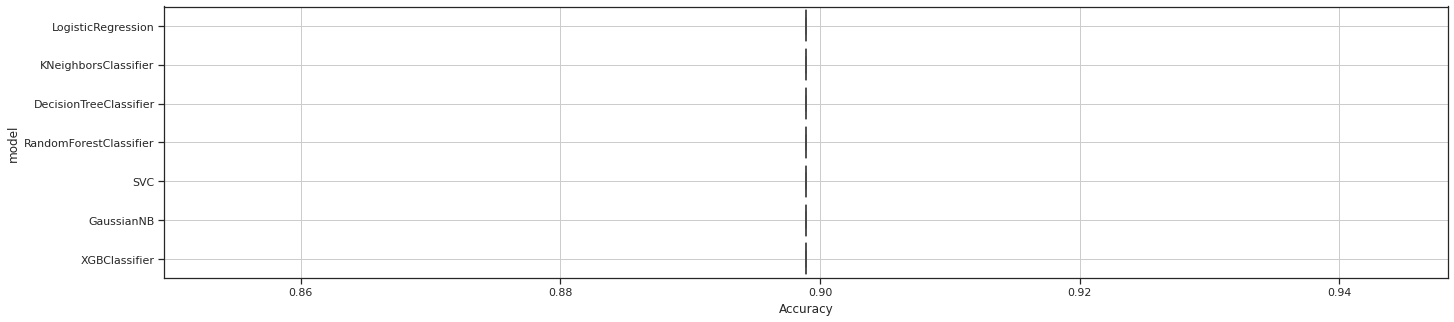

In [72]:
# który rodzaj modelu jest najbardziej skuteczny?

fig = plt.figure(figsize=(23, 5))

g = sns.boxplot(data=models_df, x='Accuracy', y='model')

# neptune.log_image('Box_plot_Models_accuracy', fig)




plt.grid()
plt.show()

In [ ]:
# Czy występują jakieś różnice pomiędzy transformatorami?

fig = plt.figure( figsize=(23,5))


g = sns.boxplot(data=models_df, x='Accuracy', y= 'num_transformer', )
g.grid()



plt.show()

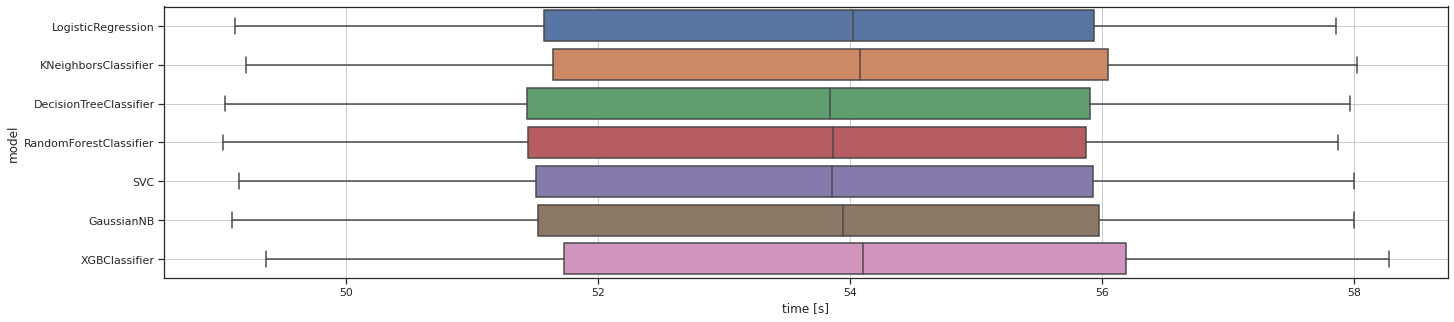

In [73]:
# Porównanie czasów trenowania modeli:

fig = plt.figure(figsize=(23, 5))

g = sns.boxplot(data=models_df, x='time_elapsed', y='model')
g.set(xlabel='time [s]')

plt.grid()


# neptune.log_image('Box_plot_Models_time_elapsed', fig)


plt.show()

In [117]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval

In [83]:
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750])
    }

In [84]:
space

{'criterion': <hyperopt.pyll.base.Apply at 0x7f0239200250>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7f0239200490>,
 'max_features': <hyperopt.pyll.base.Apply at 0x7f02392005d0>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7f0239200890>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x7f0239200a10>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x7f0239200b50>}

In [112]:
space_param = hp.choice ('classifier_model', [
                                                { 'model'          : 'LogisticRegression',
                                                  'penalty'        : hp.choice('penalty', ['l2'] ),
                                                  'C'              : hp.lognormal('LogisticRegression_C', 0, 1.0),
                                            
                                                
                                                },
                                                { 'model'          :  'KNeighborsClassifier',
                                                  'n_neighbors'    : hp.choice('n_neighbors', [ 2, 3, 5 ] ),
                                                },  
                                                { 'model'          :  'DecisionTreeClassifier',
                                                  'max_depth'      : hp.quniform('DecisionTreeClassifier_max_depth', 2, 5, 1),
                                                },  
                                                { 'model'          : 'RandomForestClassifier',
                                                  'max_depth'      : hp.quniform('RandomForestClassifier_max_depth', 2, 5, 1),
                                                },    
                                                { 'model'          : 'SVC',
                                                  'C'              : hp.lognormal('SVC_C', 0, 1.0),               
                                                },                                 
                                  ] )

In [113]:
def objective(params):

    classifier_model = params['model']

    del params['model']

    if classifier_model == 'SVC':

        clf = SVC(**params)

    elif classifier_model == 'RandomForestClassifier':

        clf = RandomForestClassifier(**params)

    elif classifier_model == 'LogisticRegression':

        clf = LogisticRegression(**params)

    elif classifier_model == 'DecisionTreeClassifier':

        clf = DecisionTreeClassifier(**params)

    elif classifier_model == 'KNeighborsClassifier':

        clf = KNeighborsClassifier(**params)     

    else:

        return 0

    accuracy = cross_val_score(clf, X_train, y_train, cv = 3).mean()

    

    # Because fmin() tries to minimize the objective, this function must return the negative accuracy. 
    return {'loss': -accuracy, 'status': STATUS_OK}

In [85]:
def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 3).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [114]:
trials = Trials()
best = fmin(
            fn= objective,
            space= space_param,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials
            )
best

  2%|▎         | 2/80 [00:06<06:06,  4.70s/it, best loss: -0.5180699514358115]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




  4%|▍         | 3/80 [00:08<04:47,  3.73s/it, best loss: -0.5285226424119273]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




  5%|▌         | 4/80 [00:15<05:55,  4.68s/it, best loss: -0.5285226424119273]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




  6%|▋         | 5/80 [00:16<04:39,  3.72s/it, best loss: -0.5403444578781998]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 22%|██▎       | 18/80 [00:36<00:53,  1.16it/s, best loss: -0.8744563509822756]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 24%|██▍       | 19/80 [00:37<01:03,  1.05s/it, best loss: -0.8744563509822756]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/usr/local/lib/python3.7/dist-packages/sklearn/l

 25%|██▌       | 20/80 [00:39<01:10,  1.18s/it, best loss: -0.8744563509822756]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 44%|████▍     | 35/80 [01:11<02:10,  2.89s/it, best loss: -0.8771742222957591]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 45%|████▌     | 36/80 [01:13<01:48,  2.48s/it, best loss: -0.8771742222957591]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 48%|████▊     | 38/80 [01:22<02:20,  3.34s/it, best loss: -0.8771742222957591]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 49%|████▉     | 39/80 [01:23<01:54,  2.79s/it, best loss: -0.8771742222957591]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 57%|█████▊    | 46/80 [01:44<01:28,  2.60s/it, best loss: -0.8771742222957591]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 59%|█████▉    | 47/80 [01:45<01:14,  2.25s/it, best loss: -0.8771742222957591]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 65%|██████▌   | 52/80 [01:57<01:27,  3.11s/it, best loss: -0.8771742222957591]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 68%|██████▊   | 54/80 [01:58<00:48,  1.88s/it, best loss: -0.8771742222957591]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 75%|███████▌  | 60/80 [02:06<00:21,  1.09s/it, best loss: -0.8771742222957591]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 76%|███████▋  | 61/80 [02:07<00:22,  1.20s/it, best loss: -0.8771742222957591]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 94%|█████████▍| 75/80 [02:40<00:08,  1.60s/it, best loss: -0.8771742222957591]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




 95%|█████████▌| 76/80 [02:42<00:06,  1.56s/it, best loss: -0.8771742222957591]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




100%|██████████| 80/80 [02:53<00:00,  2.17s/it, best loss: -0.8771742222957591]


{'RandomForestClassifier_max_depth': 5.0, 'classifier_model': 3}

In [119]:
space_eval(space_param, best)

{'max_depth': 5.0, 'model': 'RandomForestClassifier'}

### <a name='19'></a>6.2.1 Model regresji logistycznej

In [ ]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8217391304347826

In [ ]:
# Sprawdzimy jak model działa na danych treningowych i testowych:

print('Accuracy(train): {}'.format(round(log_reg.score(X_train, y_train), 4) ))
print('Accuracy(test): {}'.format(round(log_reg.score(X_test, y_test), 4) ))

Accuracy(train): 0.8188
Accuracy(test): 0.8217


In [ ]:
y_pred = log_reg.predict(X_test)

# Wyświetlimy 30 pierwszych próbek
y_pred[:30]

array([2, 2, 1, 0, 1, 2, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0, 2, 1, 2, 0,
       2, 0, 2, 1, 2, 1, 0, 1])

In [ ]:
log_reg_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print(log_reg_report)

                precision    recall  f1-score   support

     CANDIDATE       0.65      0.56      0.60       426
     CONFIRMED       0.64      0.72      0.67       450
FALSE POSITIVE       0.99      0.99      0.99       964

      accuracy                           0.82      1840
     macro avg       0.76      0.75      0.75      1840
  weighted avg       0.82      0.82      0.82      1840



### <a name='20'></a>6.2.2 Model k-najbliższych sąsiadów



In [ ]:
KNeighbors_classifier = KNeighborsClassifier(n_neighbors=8)
KNeighbors_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
y_pred = KNeighbors_classifier.predict(X_test)
 	
sns.boxplot(data=models_df, x='score', y='model')accuracy_score(y_test, y_pred)

0.8103260869565218

In [ ]:
# Sprawdzimy jak model działa na danych treningowych i testowych:

print('Accuracy(train): {}'.format(round(KNeighbors_classifier.score(X_train, y_train), 4) ))
print('Accuracy(test): {}'.format(round(KNeighbors_classifier.score(X_test, y_test), 4) ))

Accuracy(train): 0.8564
Accuracy(test): 0.8103


In [ ]:
KNeighbors_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print(KNeighbors_report)

                precision    recall  f1-score   support

     CANDIDATE       0.60      0.64      0.62       426
     CONFIRMED       0.64      0.59      0.62       450
FALSE POSITIVE       0.98      0.99      0.99       964

      accuracy                           0.81      1840
     macro avg       0.74      0.74      0.74      1840
  weighted avg       0.81      0.81      0.81      1840



### <a name='21'></a>6.2.3 Model drzewa decyzyjnego

In [ ]:
tree_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)

tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_pred = tree_classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.8668478260869565

In [ ]:
# Sprawdzimy jak model działa na danych treningowych i testowych:

print('Accuracy(train): {}'.format(round(tree_classifier.score(X_train, y_train), 4) ))
print('Accuracy(test): {}'.format(round(tree_classifier.score(X_test, y_test), 4) ))

Accuracy(train): 0.8603
Accuracy(test): 0.8668


In [ ]:
# Sprawdzamy, które cechy w naszym modelu miały duży wpływ na działanie modelu
tree_classifier.feature_importances_    

array([3.03736520e-01, 2.45133627e-01, 2.74649540e-01, 0.00000000e+00,
       7.36665605e-04, 1.29708567e-03, 0.00000000e+00, 2.14892658e-04,
       0.00000000e+00, 1.66078842e-03, 0.00000000e+00, 0.00000000e+00,
       1.71917170e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.53710345e-04, 0.00000000e+00, 0.00000000e+00])

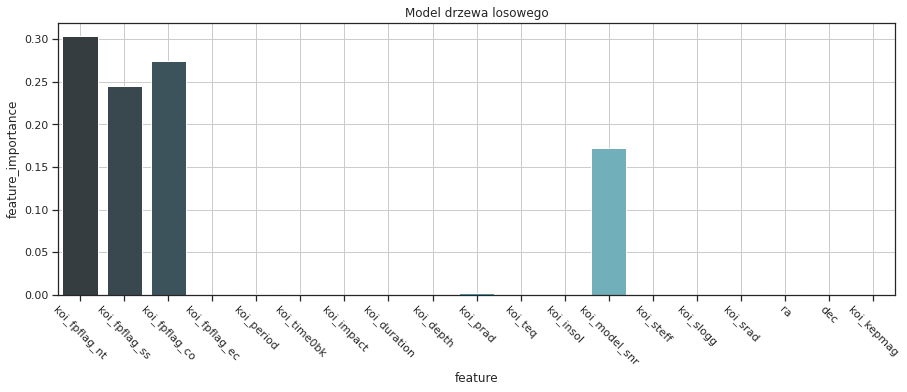

In [ ]:
feature_names = kepler.drop("koi_disposition", axis=1).columns
target_names = 'koi_disposition'

features = pd.DataFrame(data={'feature': feature_names, 'feature_importance': tree_classifier.feature_importances_})


plt.figure(figsize=(15, 5))

g = sns.barplot(data=features, x='feature', y='feature_importance',  palette='GnBu_d')
g.set(title='Model drzewa losowego')
g.set_xticklabels( g.get_xticklabels(), rotation=-45 )

plt.grid()
plt.show()

In [ ]:
px.bar(features, x='feature', y='feature_importance', width=800, height=400, title='Model drzewa losowego')

In [ ]:
tree_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print(tree_report)

                precision    recall  f1-score   support

     CANDIDATE       0.80      0.63      0.70       426
     CONFIRMED       0.71      0.88      0.79       450
FALSE POSITIVE       0.99      0.96      0.98       964

      accuracy                           0.87      1840
     macro avg       0.83      0.83      0.82      1840
  weighted avg       0.87      0.87      0.87      1840



### <a name='22'></a>6.2.4 Model lasów losowych

In [ ]:
forest_classifier = RandomForestClassifier(n_estimators=15, random_state=42)

forest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = forest_classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.8972826086956521

In [ ]:
# Sprawdzimy jak model działa na danych treningowych i testowych:

print('Accuracy(train): {}'.format(round(forest_classifier.score(X_train, y_train), 4) ))
print('Accuracy(test): {}'.format(round(forest_classifier.score(X_test, y_test), 4) ))

Accuracy(train): 0.9973
Accuracy(test): 0.8973


In [ ]:
forest_classifier.feature_importances_                       

array([0.11766867, 0.09601336, 0.12930446, 0.04249473, 0.04563359,
       0.0284512 , 0.04530643, 0.03584097, 0.06288055, 0.06680988,
       0.02923202, 0.04432084, 0.12112603, 0.02570949, 0.02038829,
       0.02331105, 0.02195514, 0.02106838, 0.02248491])

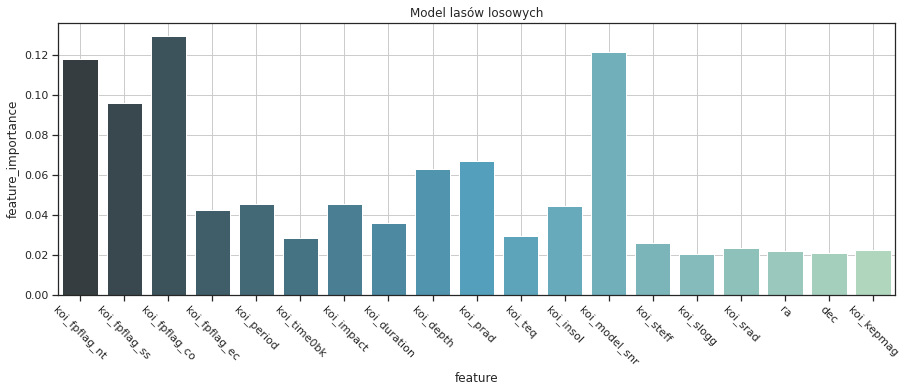

In [ ]:
features = pd.DataFrame(data={'feature': feature_names, 'feature_importance': forest_classifier.feature_importances_})

plt.figure(figsize=(15, 5))

g = sns.barplot(data=features, x='feature', y='feature_importance', palette='GnBu_d')
g.set(title='Model lasów losowych')
g.set_xticklabels( g.get_xticklabels(), rotation=-45 )

plt.grid()
plt.show()

In [ ]:
px.bar(features, x='feature', y='feature_importance', width=800, height=400, title='Model lasów losowych')

In [ ]:
forest_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print(forest_report)

                precision    recall  f1-score   support

     CANDIDATE       0.79      0.79      0.79       426
     CONFIRMED       0.81      0.80      0.81       450
FALSE POSITIVE       0.99      0.99      0.99       964

      accuracy                           0.90      1840
     macro avg       0.86      0.86      0.86      1840
  weighted avg       0.90      0.90      0.90      1840



### <a name='23'></a>6.2.5 Maszyna wektorów nośnych

In [ ]:
svc_classifier = SVC(C=1.0, kernel='rbf')

svc_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svc_classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.8358695652173913

In [ ]:
# Sprawdzimy jak model działa na danych treningowych i testowych:

print('Accuracy(train): {}'.format(round(svc_classifier.score(X_train, y_train), 4) ))
print('Accuracy(test): {}'.format(round(svc_classifier.score(X_test, y_test), 4) ))

Accuracy(train): 0.8289
Accuracy(test): 0.8359


In [ ]:
svc_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print(svc_report)

                precision    recall  f1-score   support

     CANDIDATE       0.70      0.55      0.62       426
     CONFIRMED       0.65      0.78      0.71       450
FALSE POSITIVE       0.98      0.99      0.99       964

      accuracy                           0.84      1840
     macro avg       0.78      0.77      0.77      1840
  weighted avg       0.84      0.84      0.83      1840



### <a name='24'></a>6.2.6 Naiwny klasyfikator bayesowski

In [ ]:
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = GaussianNB_model.predict(X_test)

accuracy_score(y_test, y_pred)

0.6842391304347826

In [ ]:
# Sprawdzimy jak model działa na danych treningowych i testowych:

print('Accuracy(train): {}'.format(round(GaussianNB_model.score(X_train, y_train), 4) ))
print('Accuracy(test): {}'.format(round(GaussianNB_model.score(X_test, y_test), 4) ))

Accuracy(train): 0.6935
Accuracy(test): 0.6842


## <a name='25'></a>6.3 Porównanie otrzymanych wyników

In [ ]:
metric_cols =[
              ('score log_reg',    'Train[%]'), ('score log_reg',    'Test[%]'),
              ('score KNeighbors', 'Train[%]'), ('score KNeighbors', 'Test[%]'),             
              ('score tree',       'Train[%]'), ('score tree',       'Test[%]'),                          
              ('score forest',     'Train[%]'), ('score forest',     'Test[%]'),  
              ('score SVC',        'Train[%]'), ('score SVC',        'Test[%]'),             
              ('score GaussianNB', 'Train[%]'), ('score GaussianNB', 'Test[%]')
             ]

metrics_df = pd.DataFrame(columns=metric_cols )
metrics_df.columns = pd.MultiIndex.from_tuples(metrics_df.columns)

index = 0

for i in range(20):  
  # podzielimy dane na zbior2y uczące i testowe:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  # Skalowanie cech
  scaler = StandardScaler()
  scaler.fit(X_train)

  X_train = scaler.transform(X_train)
  X_test  = scaler.transform(X_test)  

  # Testowanie modeli
  log_reg = LogisticRegression(max_iter=1000)
  log_reg.fit(X_train, y_train)

  KNeighbors_classifier = KNeighborsClassifier(n_neighbors=8)
  KNeighbors_classifier.fit(X_train, y_train) 

  tree_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
  tree_classifier.fit(X_train, y_train)

  forest_classifier = RandomForestClassifier(n_estimators=15, random_state=42)
  forest_classifier.fit(X_train, y_train)  

  svc_classifier = SVC(C=1.0, kernel='rbf')
  svc_classifier.fit(X_train, y_train)  

  GaussianNB_model = GaussianNB()
  GaussianNB_model.fit(X_train, y_train)  

  # ---------------------------------------------------------------------------
  score_log_reg_train    = round(log_reg.score(X_train, y_train)*100, 3)
  score_log_reg_test     = round(log_reg.score(X_test, y_test)*100, 3)

  score_KNeighbors_train = round(KNeighbors_classifier.score(X_train, y_train)*100, 3)  
  score_KNeighbors_test  = round(KNeighbors_classifier.score(X_test, y_test)*100, 3) 

  score_tree_train       = round(tree_classifier.score(X_train, y_train)*100, 3)  
  score_tree_test        = round(tree_classifier.score(X_test, y_test)*100, 3) 

  score_forest_train     = round(forest_classifier.score(X_train, y_train)*100, 3)  
  score_forest_test      = round(forest_classifier.score(X_test, y_test)*100, 3) 

  score_svc_train        = round(svc_classifier.score(X_train, y_train)*100, 3)  
  score_svc_test         = round(svc_classifier.score(X_test, y_test)*100, 3)  

  score_GaussianNB_train = round(GaussianNB_model.score(X_train, y_train)*100, 3)  
  score_GaussianNB_test  = round(GaussianNB_model.score(X_test, y_test)*100, 3)      
  # -----------------------------------------------------------------------------
  metrics_df.loc[index] = [
                           score_log_reg_train, score_log_reg_test,
                           score_KNeighbors_train, score_KNeighbors_test,
                           score_tree_train, score_tree_test,
                           score_forest_train, score_forest_test,
                           score_svc_train, score_svc_test,
                           score_GaussianNB_train, score_GaussianNB_test                        
                          ]

  index +=1

metrics_df.tail()

score log_reg         score KNeighbors  ... score SVC score GaussianNB        
        Train[%] Test[%]         Train[%]  ...   Test[%]         Train[%] Test[%]
15        81.997  80.761           85.815  ...    80.652           76.087  73.424
16        81.916  81.522           85.421  ...    82.011           71.073  72.174
17        82.201  81.033           84.918  ...    81.793           68.995  69.728
18        81.304  83.587           85.421  ...    83.152           68.560  70.217
19        81.535  82.011           85.774  ...    81.902           69.620  70.054

[5 rows x 12 columns]

## <a name='26'></a>6.4 Przeprowadzenie walidacji krzyżowej

In [ ]:
class CrossVal:
  '''
  Create cross validation and  plot barplot
  ''' 
  def __init__(self, model_dict, cv):
    '''
    model_dict - dict of model names
    cv - determines the cross-validation splitting strategy 
    '''   
    self.cv = cv
    self.model_dict = model_dict
    self.row_num = 1
    self.col_num = 1
    self.cross_val_scores_df = pd.DataFrame()
    self.titleList = []

  def Create_cross_val_df(self):                    
    for i, self.name in enumerate(model_dict):
      model = [val for val in model_dict.values() ][i]
      self.cross_val_scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=self.cv)
      
      self.cross_val_scores_df[self.name] = self.cross_val_scores 

      self.title=f'model: {self.name}<br>Accuracy: {self.cross_val_scores_df[self.name].mean():.4f} (+/- {self.cross_val_scores_df[self.name].std():.3f})'
      self.titleList.append( self.title)

    return self.cross_val_scores_df
    
  def Create_barplots(self):
      fig = make_subplots(rows=2, cols=3,
      subplot_titles=self.titleList
          )
      for i, name in enumerate(model_dict):
        if self.col_num == 4:
          self.col_num  = 1
          self.row_num += 1
        name =px.bar( self.cross_val_scores_df, y= name, color= name )      
        fig.add_trace(name['data'][0], row=self.row_num, col=self.col_num)
        self.col_num += 1

      fig.update_layout( title_text=f'Walidacja krzyżowa dla {self.cv} podziałów:', coloraxis=dict(colorscale='Viridis'))
      fig.show()                           

In [ ]:
model_dict = {
              'logistic regression'   : log_reg,
              'KNeighbors classifier' : KNeighbors_classifier,
              'tree classifier'       : tree_classifier,
              'forest classifier'     : forest_classifier,
              'svc classifier'        : svc_classifier,
              'GaussianNB model'      : GaussianNB_model
              }

crossVal = CrossVal(model_dict, cv= 15)

In [ ]:
models_acc_df = crossVal.Create_cross_val_df()
models_acc_df

,logistic regression,KNeighbors classifier,tree classifier,forest classifier,svc classifier,GaussianNB model
0,0.832994,0.818737,0.883910,0.904277,0.830957,0.708758
1,0.822811,0.818737,0.879837,0.904277,0.822811,0.676171
2,0.832994,0.826884,0.867617,0.881874,0.849287,0.708758
3,0.818737,0.782077,0.857434,0.865580,0.816701,0.708758
4,0.804481,0.800407,0.841141,0.855397,0.830957,0.696538
5,0.806517,0.812627,0.869654,0.892057,0.824847,0.684318
6,0.792261,0.818737,0.843177,0.896130,0.816701,0.690428
7,0.790224,0.822811,0.855397,0.885947,0.814664,0.708758
8,0.824847,0.808554,0.867617,0.896130,0.814664,0.684318
9,0.816701,0.822811,0.849287,0.885947,0.830957,0.704684


In [ ]:
crossVal.titleList

['model: logistic regression<br>Accuracy: 0.8136 (+/- 0.020)',
 'model: KNeighbors classifier<br>Accuracy: 0.8102 (+/- 0.012)',
 'model: tree classifier<br>Accuracy: 0.8590 (+/- 0.013)',
 'model: forest classifier<br>Accuracy: 0.8863 (+/- 0.014)',
 'model: svc classifier<br>Accuracy: 0.8251 (+/- 0.015)',
 'model: GaussianNB model<br>Accuracy: 0.7012 (+/- 0.020)']

In [ ]:
crossVal.Create_barplots()

In [ ]:
model_ranking = pd.DataFrame({'Accuracy' : models_acc_df.mean().sort_values()})
model_ranking

,Accuracy
GaussianNB model,0.701228
KNeighbors classifier,0.810186
logistic regression,0.813586
svc classifier,0.825136
tree classifier,0.858964
forest classifier,0.886277


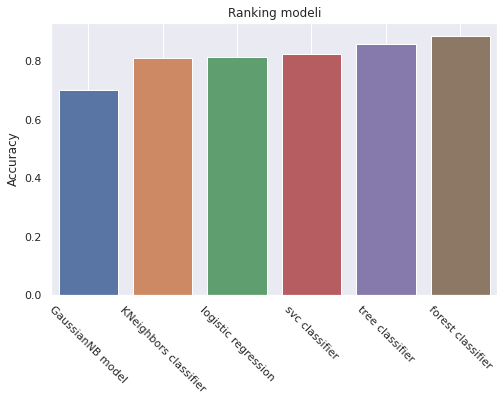

In [ ]:
plt.figure(figsize=(8, 5))
sns.set_style("darkgrid")

g = sns.barplot(data=model_ranking, x=model_ranking.index, y='Accuracy')
g.set(title='Ranking modeli')
g.set_xticklabels( g.get_xticklabels(), rotation=-45 )

plt.grid()
plt.show()


## <a name='27'></a>6.5 Podgląd na macierze błędów dla poszczególnych modeli


In [ ]:
class ConfusionMatrix:

  def __init__(self, model_dict, X_test, y_test):
    self.model_dict = model_dict
    self.X_test = X_test
    self.y_test = y_test
    self.y_pred_list = []
    self.model_name_idx = 0
    self.y_pred_idx = 0

 
  def __get_y_pred(self):
    for i, name in enumerate(self.model_dict):
      self.model = [val for val in self.model_dict.values() ][i]
      self.y_pred = self.model.predict(self.X_test) 
      self.y_pred_list.append( self.y_pred )

  def create_matrix(self):
    self.__get_y_pred()

    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(25, 5))
    fig.subplots_adjust(hspace=0.8, wspace=0.3)

    for i in range(1, 7):
      fig.add_subplot(2, 3, i) 

      self.cm = confusion_matrix(self.y_test, self.y_pred_list[self.y_pred_idx])
      self.model_acc = accuracy_score(self.y_test,   self.y_pred_list[self.y_pred_idx])


      g = sns.heatmap(self.cm, annot=True, fmt='d', linewidth=.2, cmap='Blues',
                      xticklabels= encoder.classes_, yticklabels= encoder.classes_,
                      annot_kws={"size": 15})
      
      g.tick_params(labelsize=10)
      g.xaxis.tick_top()
      plt.yticks(rotation=0) 
      plt.xticks(rotation=0) 
      plt.title(f'{list(model_dict.keys())[self.model_name_idx]} \n Accuracy: {self.model_acc:.4f}', fontdict={'fontsize' : 15, 'weight':'bold'})

      self.model_name_idx += 1
      self.y_pred_idx += 1
    plt.show()

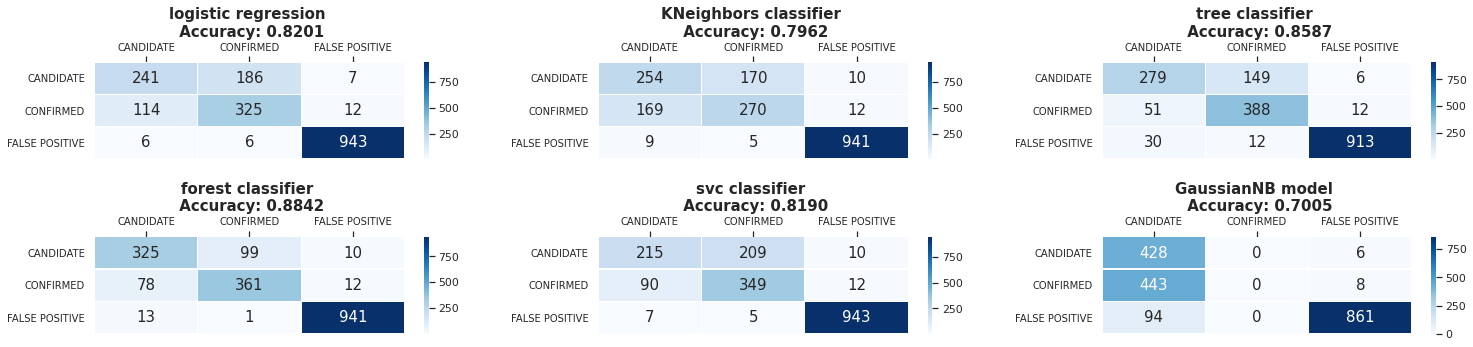

In [ ]:
models_conf_matrix = ConfusionMatrix(
                                 model_dict= model_dict,
                                 X_test= X_test,
                                 y_test= y_test
                                 )

models_conf_matrix.create_matrix()   

## <a name='28'></a>6.6 Testowanie sieci neuronowej

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout

from tensorflow.keras import optimizers
from keras.utils.np_utils import to_categorical



np.set_printoptions(precision=12, suppress=True)

In [ ]:
print('X_train: ', X_train.shape, X_train.dtype)
print('y_train: ', y_train.shape, y_train.dtype)

X_train:  (7360, 19) float64
y_train:  (7360,) int64


In [ ]:
X_train[0]

array([-0.457311950937,  1.795161470323, -0.49489956062 , -0.372072226437,
       -0.048847912679,  0.094720502123,  0.513052260585, -0.539999246619,
       -0.288513774889,  0.081648435358,  1.502371758554, -0.003423302677,
       -0.249837213357,  2.966745419313, -0.692937868167,  0.082256790584,
        0.110301644584, -0.127777935713, -2.725600256917])

In [ ]:
y_train[0]

2

In [ ]:
X_32train = X_train.astype('float32')
y_32train = to_categorical(y_train.astype('float32'))


X_32test = X_test.astype('float32')
y_32test = to_categorical(y_test.astype('float32'))


In [ ]:
y_32train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
visible = Input(shape=(19,))

y = Dense(64, activation='relu')(visible)
y= Dropout(0.5)(y)
y = Dense(64, activation='relu')(y)
y = Dense(16, activation='relu')(y)
y = Dense(8, activation='relu')(y)
y = Dense(4, activation='relu')(y)

output = Dense(3, activation='softmax')(y)

model = Model(inputs=visible, outputs=output)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 19)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1280      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                

In [ ]:
model.compile(optimizer= optimizers.Adam(lr=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history = model.fit(x= X_32train, y= y_32train, epochs=150, batch_size=32, validation_split=0.1)

Epoch 1/150
207/207 [==============================] - 0s 2ms/step - loss: 1.0924 - accuracy: 0.4589 - val_loss: 1.0672 - val_accuracy: 0.5272
Epoch 2/150
207/207 [==============================] - 0s 2ms/step - loss: 1.0342 - accuracy: 0.5047 - val_loss: 0.9808 - val_accuracy: 0.5299
Epoch 3/150
207/207 [==============================] - 0s 2ms/step - loss: 0.9651 - accuracy: 0.5133 - val_loss: 0.9089 - val_accuracy: 0.5299
Epoch 4/150
207/207 [==============================] - 0s 2ms/step - loss: 0.8987 - accuracy: 0.5305 - val_loss: 0.8336 - val_accuracy: 0.5870
Epoch 5/150
207/207 [==============================] - 0s 1ms/step - loss: 0.8316 - accuracy: 0.5876 - val_loss: 0.7546 - val_accuracy: 0.7052
Epoch 6/150
207/207 [==============================] - 0s 2ms/step - loss: 0.7716 - accuracy: 0.6735 - val_loss: 0.6832 - val_accuracy: 0.7378
Epoch 7/150
207/207 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.7111 - val_loss: 0.6291 - val_accuracy: 0.7418

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
scores = model.evaluate(x=X_32test, y=y_32test, batch_size=32)
print('Loss: ', scores[0])
print('Accuracy: ', scores[1])


58/58 [==============================] - 0s 1ms/step - loss: 0.4044 - accuracy: 0.7576
Loss:  0.4043964445590973
Accuracy:  0.7576087117195129


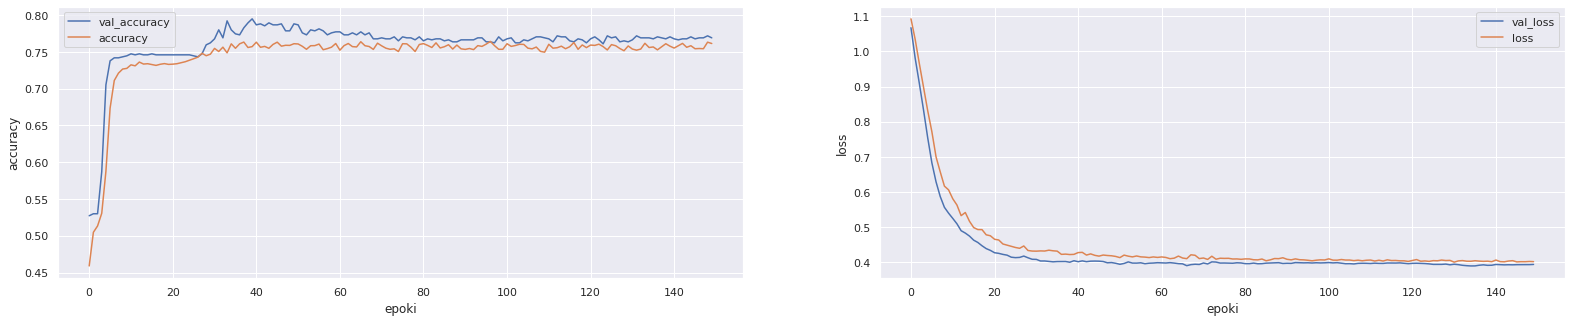

In [ ]:
metric = 'accuracy'
val_metric = 'val_accuracy'


sns.set_style("darkgrid")
fig, axes = plt.subplots(1,2, figsize=(27,5))

for i in range(2):
  if i == 1:
        metric = 'loss'
        val_metric = 'val_loss'
  axes[i].plot(history.history[ val_metric], label= val_metric)
  axes[i].plot(history.history[ metric], label= metric)
  axes[i].set(xlabel='epoki', ylabel= metric)  
  axes[i].legend(loc='best')
plt.show()

## <a name='29'></a>6.7 Zastosowanie redukcji wymiarowości - algorytm PCA

In [ ]:
kepler.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,1,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,2,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,2,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,1,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509


In [ ]:
print(f'X_train shape:  {X_train.shape}')
print(f'X_test shape:   {X_test.shape}')

X_train shape:  (7360, 19)
X_test shape:   (1840, 19)


In [ ]:
X_train[:3]

array([[-0.457311950937,  1.795161470323, -0.49489956062 ,
        -0.372072226437, -0.048847912679,  0.094720502123,
         0.513052260585, -0.539999246619, -0.288513774889,
         0.081648435358,  1.502371758554, -0.003423302677,
        -0.249837213357,  2.966745419313, -0.692937868167,
         0.082256790584,  0.110301644584, -0.127777935713,
        -2.725600256917],
       [ 2.186691158958, -0.557052954028, -0.49489956062 ,
        -0.372072226437, -0.049867481938, -0.509083761209,
        -0.188223898435,  0.518617067836, -0.293365750088,
        -0.035540520906,  0.255253093317, -0.044247233224,
        -0.309002159202, -0.795640085285,  0.527988652408,
        -0.164902743079, -0.400064766674, -0.528376383387,
        -1.07642975782 ],
       [-0.457311950937, -0.557052954028,  2.02061201822 ,
        -0.372072226437, -0.050423619346, -0.507902103629,
         0.076532467373, -0.661888458793, -0.292090551478,
        -0.030423860945,  2.308184646111,  0.075974204248,
    

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

X_train_pca.shape

(7360, 3)

In [ ]:
pca.explained_variance_ratio_

array([0.146361605658, 0.110723772716, 0.101027698858])

In [ ]:
classes = encoder.inverse_transform(y_train)

classes

array(['FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', ...,
       'FALSE POSITIVE', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [ ]:
pca_df = pd.DataFrame(data={'pca_1': X_train_pca[:, 0], 'pca_2': X_train_pca[:, 1], 'pca_3': X_train_pca[:, 2], 'koi disposition' : classes})

pca_df.head()

,pca_1,pca_2,pca_3,koi disposition
0,2.483721,-0.965843,0.909020,FALSE POSITIVE
1,-0.150786,1.030759,0.792360,FALSE POSITIVE
2,2.065013,0.834712,-1.561266,FALSE POSITIVE
3,-0.018583,0.176301,0.323042,CANDIDATE
4,-1.005092,1.232341,2.094790,FALSE POSITIVE


In [ ]:
# Procent wyjąśnionej wariancji

kepler_results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})

kepler_results['cumulative'] = kepler_results['explained_variance_ratio'].cumsum() # obliczenie skumulowanej wariancji wyjaśnionej
kepler_results['component'] = kepler_results.index + 1

kepler_results

,explained_variance_ratio,cumulative,component
0,0.146361,0.146361,1
1,0.110724,0.257085,2
2,0.101027,0.358112,3


In [ ]:
pca_data_df = pca_df[pca_df.columns[:-1]]

pca_data_df.head()

,pca_1,pca_2,pca_3
0,2.483721,-0.965843,0.909020
1,-0.150786,1.030759,0.792360
2,2.065013,0.834712,-1.561266
3,-0.018583,0.176301,0.323042
4,-1.005092,1.232341,2.094790


## <a name='30'></a>6.8 Alogrytm KMeans

In [ ]:
from sklearn.cluster import KMeans


kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(pca_data_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_kmeans = kmeans_model.predict(pca_data_df)
y_kmeans[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

In [ ]:
pca_data_df['y_kmeans'] = y_kmeans

pca_data_df.head()

,pca_1,pca_2,pca_3,y_kmeans
0,2.483721,-0.965843,0.909020,1
1,-0.150786,1.030759,0.792360,0
2,2.065013,0.834712,-1.561266,0
3,-0.018583,0.176301,0.323042,0
4,-1.005092,1.232341,2.094790,0


In [ ]:
true_labels = encoder.inverse_transform(y_kmeans)
true_labels

array(['CONFIRMED', 'CANDIDATE', 'CANDIDATE', ..., 'CANDIDATE',
       'CONFIRMED', 'CANDIDATE'], dtype=object)

In [ ]:
pca_data_df['true_labels'] = true_labels

pca_data_df.head()

,pca_1,pca_2,pca_3,y_kmeans,true_labels
0,2.483721,-0.965843,0.909020,1,CONFIRMED
1,-0.150786,1.030759,0.792360,0,CANDIDATE
2,2.065013,0.834712,-1.561266,0,CANDIDATE
3,-0.018583,0.176301,0.323042,0,CANDIDATE
4,-1.005092,1.232341,2.094790,0,CANDIDATE


In [ ]:
px.scatter_3d(pca_data_df, x= 'pca_1', y= 'pca_2', z= 'pca_3', color= 'true_labels', template='plotly_dark', width=1000)

## <a name='31'></a>6.9 Wizualizacja skumulowanej wartości wariancji w zależności od liczby komponentów.

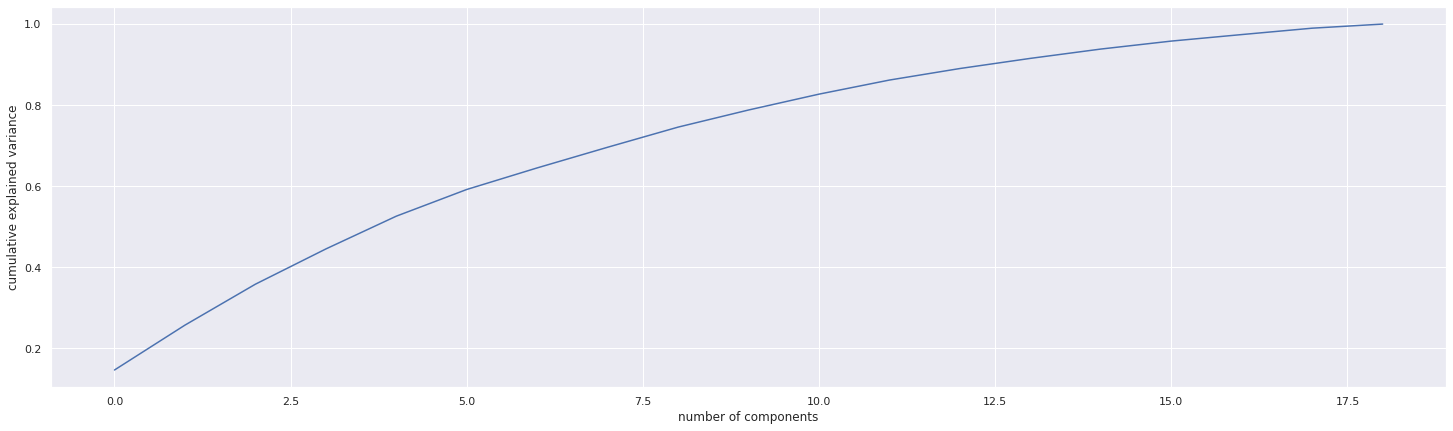

In [ ]:
pca = PCA().fit(X_train)


plt.figure(figsize=(25,7))


plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

In [ ]:
pca = PCA(n_components=16)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

X_train_pca.shape

(7360, 16)

In [ ]:
pca.explained_variance_ratio_

array([0.146361614676, 0.110723984824, 0.101028169581, 0.086945447555,
       0.08091185717 , 0.06588234664 , 0.053249957138, 0.050976138033,
       0.049663420309, 0.042236571164, 0.039131493956, 0.034771157463,
       0.028460017475, 0.025023605871, 0.022996644483, 0.019662298315])

In [ ]:
pca_df = pd.DataFrame(data={'pca_1': X_train_pca[:, 0], 'pca_2': X_train_pca[:, 1], 'pca_3': X_train_pca[:, 2], 'pca_4': X_train_pca[:, 3], 'pca_5': X_train_pca[:, 4],
                            'pca_6': X_train_pca[:, 5], 'pca_7': X_train_pca[:, 6], 'pca_8': X_train_pca[:, 7], 'pca_9': X_train_pca[:, 8], 'pca_10': X_train_pca[:, 9],
                            'pca_11': X_train_pca[:, 10], 'pca_12': X_train_pca[:, 11], 'pca_13': X_train_pca[:, 12], 'pca_14': X_train_pca[:, 13], 'pca_15': X_train_pca[:, 14],                           
                            'koi disposition' : classes})

pca_df.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,koi disposition
0,2.484246,-0.964954,0.904922,-0.191884,-1.086120,-2.835063,0.429257,0.632117,-0.005203,-0.834241,1.525559,0.753475,-0.485028,0.554070,-1.130292,FALSE POSITIVE
1,-0.154139,1.034365,0.799491,-0.586700,-0.583968,-0.092361,-0.857656,0.233002,0.123288,1.209777,-1.075457,-0.502354,0.299102,1.258579,-0.637666,FALSE POSITIVE
2,2.064454,0.834580,-1.556207,0.495741,0.053274,-0.383422,-0.813083,1.361766,-0.653496,-0.056674,-0.235398,-0.762575,-0.672567,0.276032,1.432821,FALSE POSITIVE
3,-0.018777,0.176558,0.323591,-0.468155,-0.424502,-1.268664,-0.368144,0.941771,-1.065625,-0.207693,0.267764,0.532382,0.497958,-0.266387,0.032787,CANDIDATE
4,-1.007648,1.234680,2.100723,-0.684306,-1.503756,0.789229,-0.070148,-0.235112,-0.091585,0.703025,1.212091,-0.238002,-0.226692,0.217488,-0.186385,FALSE POSITIVE


In [ ]:
# Procent wyjąśnionej wariancji

kepler_results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})

kepler_results['cumulative'] = kepler_results['explained_variance_ratio'].cumsum() # obliczenie skumulowanej wariancji wyjaśnionej
kepler_results['component'] = kepler_results.index + 1

kepler_results

,explained_variance_ratio,cumulative,component
0,0.146362,0.146362,1
1,0.110724,0.257086,2
2,0.101028,0.358114,3
3,0.086945,0.445059,4
4,0.080912,0.525971,5
5,0.065882,0.591853,6
6,0.053250,0.645103,7
7,0.050976,0.696080,8
8,0.049663,0.745743,9
9,0.042237,0.787980,10


In [ ]:
classes

array(['FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', ...,
       'FALSE POSITIVE', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [ ]:
pca_data_df = pca_df[pca_df.columns[:-1]]

pca_data_df.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15
0,2.484246,-0.964954,0.904922,-0.191884,-1.086120,-2.835063,0.429257,0.632117,-0.005203,-0.834241,1.525559,0.753475,-0.485028,0.554070,-1.130292
1,-0.154139,1.034365,0.799491,-0.586700,-0.583968,-0.092361,-0.857656,0.233002,0.123288,1.209777,-1.075457,-0.502354,0.299102,1.258579,-0.637666
2,2.064454,0.834580,-1.556207,0.495741,0.053274,-0.383422,-0.813083,1.361766,-0.653496,-0.056674,-0.235398,-0.762575,-0.672567,0.276032,1.432821
3,-0.018777,0.176558,0.323591,-0.468155,-0.424502,-1.268664,-0.368144,0.941771,-1.065625,-0.207693,0.267764,0.532382,0.497958,-0.266387,0.032787
4,-1.007648,1.234680,2.100723,-0.684306,-1.503756,0.789229,-0.070148,-0.235112,-0.091585,0.703025,1.212091,-0.238002,-0.226692,0.217488,-0.186385
